In [88]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re

train_data = pd.read_csv('/code/titanic/train.csv')
test_data = pd.read_csv('/code/titanic/test.csv')

In [89]:
for col in train_data.columns:
    print(f'{col} : {len(train_data[col].unique())}')

PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 89
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 148
Embarked : 4


In [90]:
for data in [train_data, test_data]:
    print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [91]:
# train_data['Sex'].mask(train_data['Sex']=='male', 0, inplace=True)
# train_data['Sex'].mask(train_data['Sex']=='female', 1, inplace=True)
# train_data['Sex'] = train_data['Sex'].astype('int64')

# train_data['Ticket'] = train_data['Ticket'].apply(lambda x: re.sub('[A-Z]+', '0', re.sub('^.* ', '', x)))
# train_data['Ticket'] = train_data['Ticket'].astype('int64')

# train_data['Embarked'].mask(train_data['Embarked']=='S', 0, inplace=True)
# train_data['Embarked'].mask(train_data['Embarked']=='C', 1, inplace=True)
# train_data['Embarked'].mask(train_data['Embarked']=='Q', 2, inplace=True)
# train_data['Embarked'] = train_data['Embarked'].astype('int64')

In [92]:
for data in [train_data, test_data]:
    data['Name'] = data['Name'].apply(lambda x: re.sub('^[^,]+, ', '', x))
    data['Name'] = data['Name'].apply(lambda x: re.sub(' .+', '', x))

    data['Name'][data['Name'] == 'Mlle.'] = 'Miss.'
    data['Name'][data['Name'] == 'Mme.'] = 'Mrs.'
    data['Name'][data['Name'] == 'Ms.'] = 'Miss.'
    data['Name'][data['Name'] == 'Lady.'] = 'Miss.'
    
    data['Name'][data['Name'] == 'Mrs.'] = 'Miss.'

    # data['Name'][data['Name'] == 'Master.'] = 'Mr.'
    data['Name'][data['Name'] == 'Sir.'] = 'Mr.'
    data['Name'][data['Name'] == 'the'] = 'Mr.'

    data['Name'][data['Name'] == 'Dr.'] = 'Staff.'
    data['Name'][data['Name'] == 'Capt.'] = 'Staff.'

    data['Name'][data['Name'] == 'Don.'] = 'Noble.'
    data['Name'][data['Name'] == 'Dona.'] = 'Noble.'
    data['Name'][data['Name'] == 'Rev.'] = 'Noble.'
    data['Name'][data['Name'] == 'Jonkheer.'] = 'Noble.'

    data['Name'][data['Name'] == 'Major.'] = 'Military.'
    data['Name'][data['Name'] == 'Col.'] = 'Military.'

    print(data['Name'].value_counts())

Name
Mr.          519
Miss.        312
Master.       40
Noble.         8
Staff.         8
Military.      4
Name: count, dtype: int64
Name
Mr.          240
Miss.        151
Master.       21
Noble.         3
Military.      2
Staff.         1
Name: count, dtype: int64


/tmp/ipykernel_1886/4050760147.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Name'][data['Name'] == 'Mlle.'] = 'Miss.'
/tmp/ipykernel_1886/4050760147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Name'][data['Name'] == 'Mme.'] = 'Mrs.'
/tmp/ipykernel_1886/4050760147.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Name'][data['Name'] == 'Ms.'] = 'Miss.'
/tmp/ipykernel_1886/4050760147.py:8: SettingWithCo

In [93]:
for data in [train_data, test_data]:
    data['Family'] = data['SibSp'] + data['Parch'] + 1
    # print(data['Family'].value_counts())
    data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [94]:
train_data['Fare'] = train_data['Fare'] / train_data['Family']

In [95]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
test_data['Fare'] = test_data['Fare'] / test_data['Family']

In [96]:
train_data.drop(['PassengerId','Ticket', 'Cabin'], axis=1, inplace=True)

train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data.dropna(inplace=True)


train_data['Age'] = train_data['Age'].astype('int64')

train_data = pd.get_dummies(train_data, columns=['Name','Pclass','Sex','Embarked'])
# print(train_data.head(5))

In [97]:
test_data.drop(['PassengerId','Ticket', 'Cabin'], axis=1, inplace=True)

test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data.dropna(inplace=True)


test_data['Age'] = test_data['Age'].astype('int64')

test_data = pd.get_dummies(test_data, columns=['Name','Pclass','Sex','Embarked'])
# print(test_data.head(5))

https://qiita.com/hrappuccino/items/16c20645c60578391017

labels = train_data.columns
for y_label in labels:
    print(y_label)
    train_data.groupby('Survived')[y_label].plot(kind='hist', alpha=0.5, legend=True, bins=50)
    plt.title(y_label)
    plt.show()    

In [98]:
from sklearn.model_selection import train_test_split, learning_curve

x = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

train_x, check_x, train_y, check_y = train_test_split(x, y, random_state=1, test_size=0.25)

from sklearn.metrics import mean_absolute_error,f1_score, accuracy_score

In [99]:
def show_learning_curve(model, x, y):
    test_split = np.linspace(0.1,1,10)
    size, train_score, check_score = learning_curve(
        model,
        x, y, cv=5,
        train_sizes=test_split,
        scoring='accuracy'
    )

    print(model.get_params())
    plt.figure(figsize=(10,5))
    plt.plot(test_split, train_score.mean(axis=1), label='train')
    plt.plot(test_split, check_score.mean(axis=1), label='check')
    plt.legend()
    plt.grid(True)

    plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


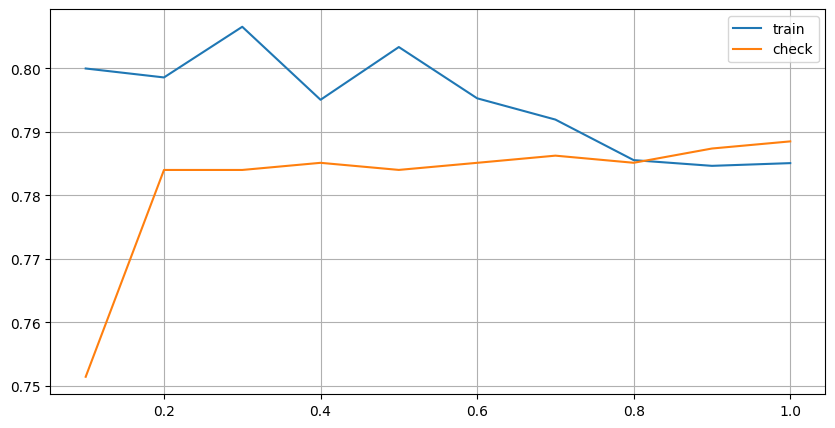

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


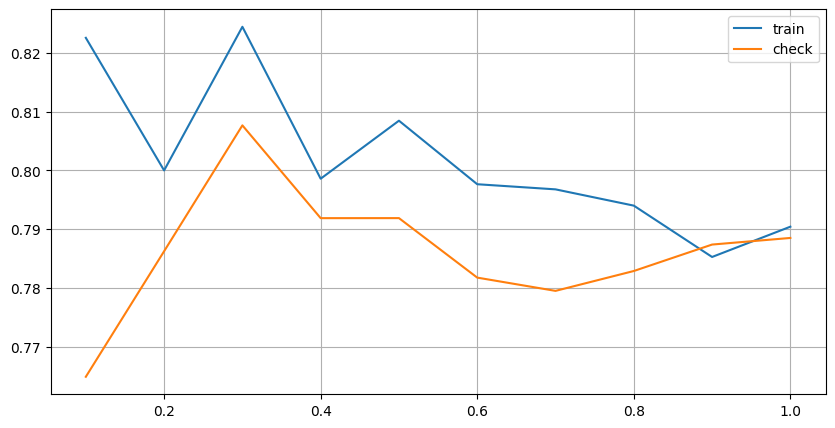

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


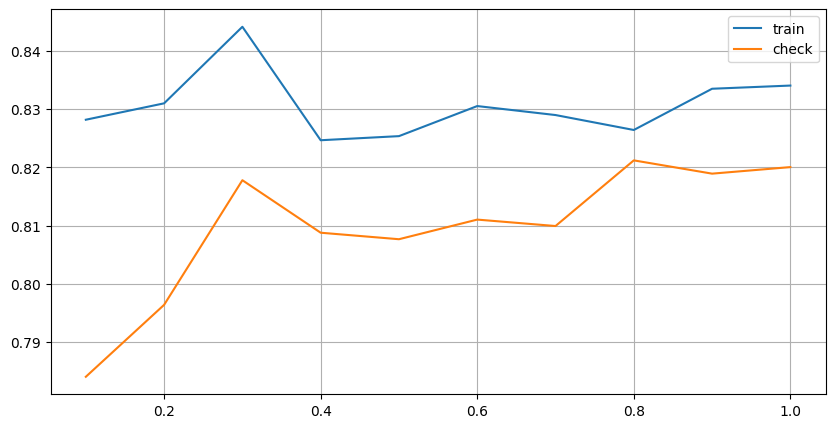

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


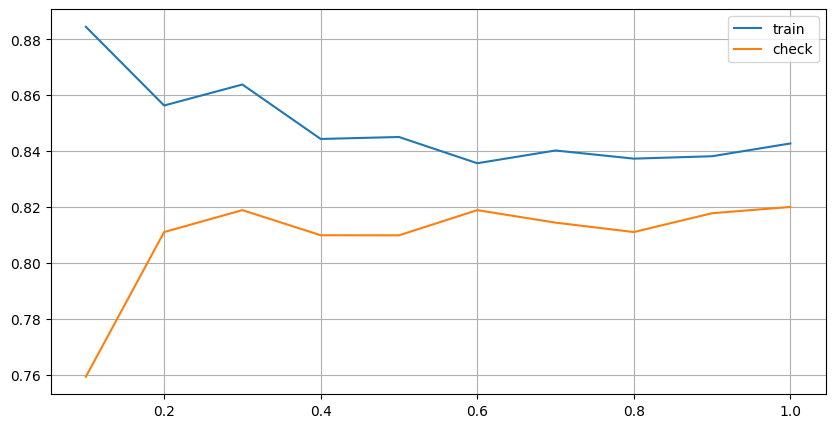

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


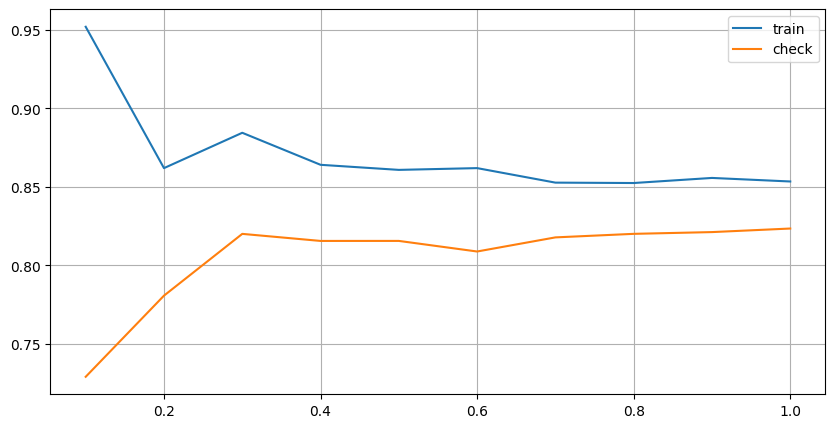

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


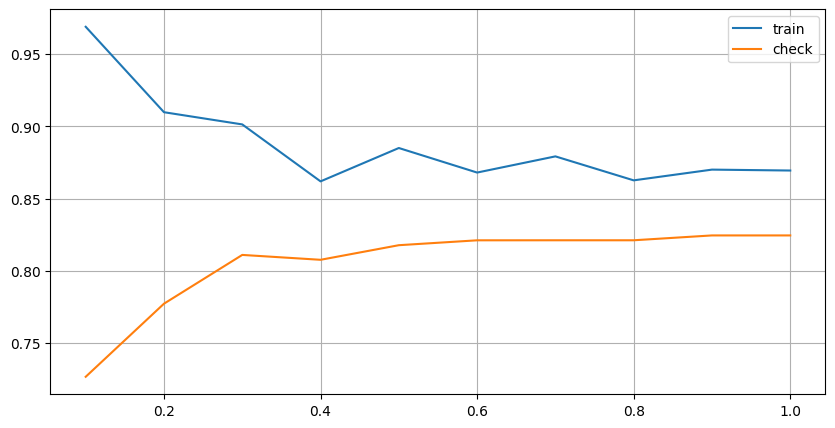

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


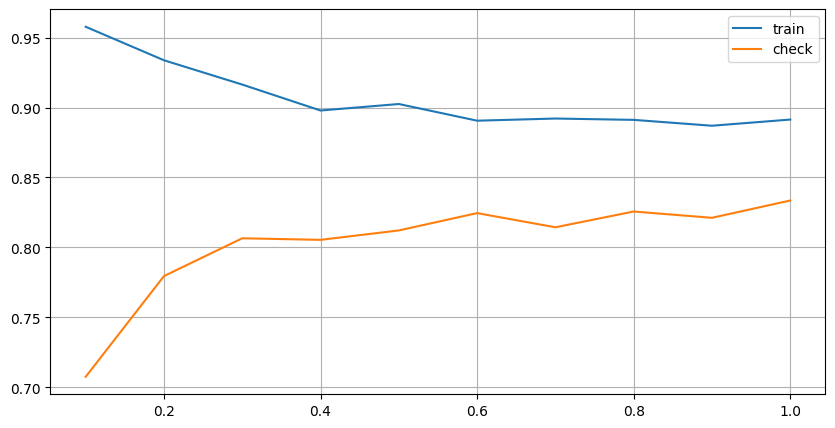

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


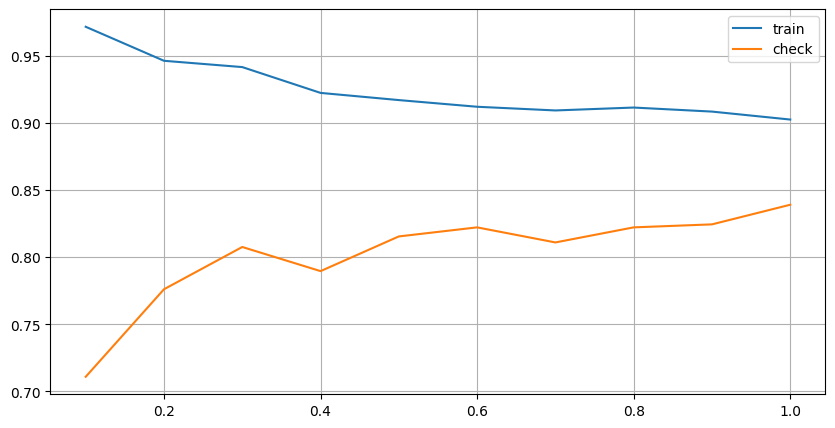

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


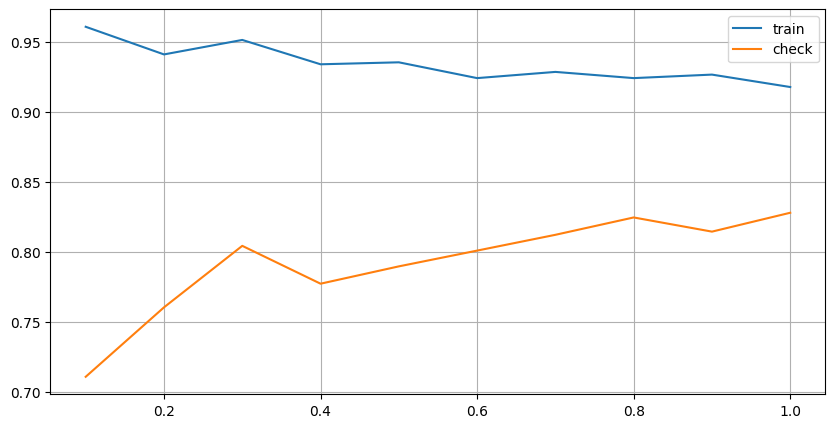

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 11, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


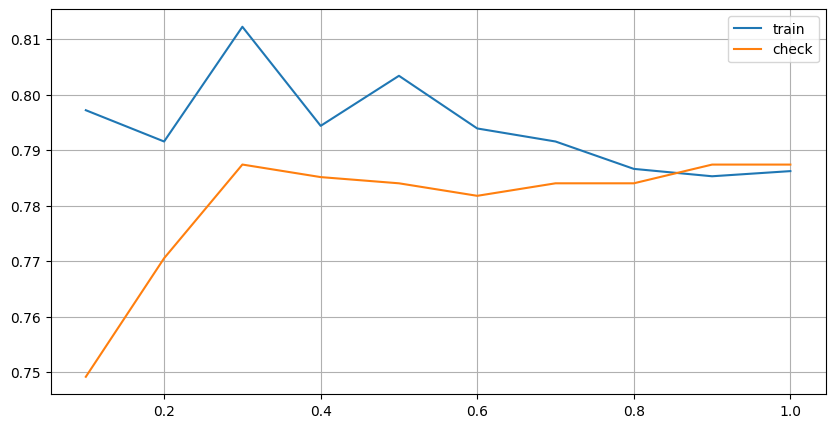

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 11, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


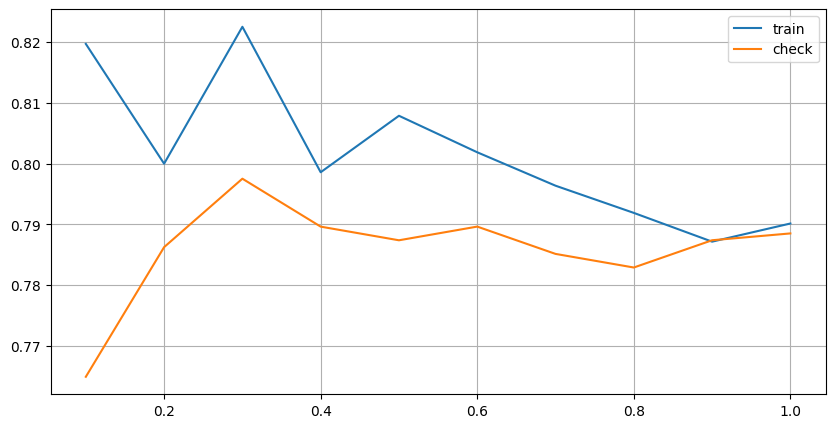

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 11, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


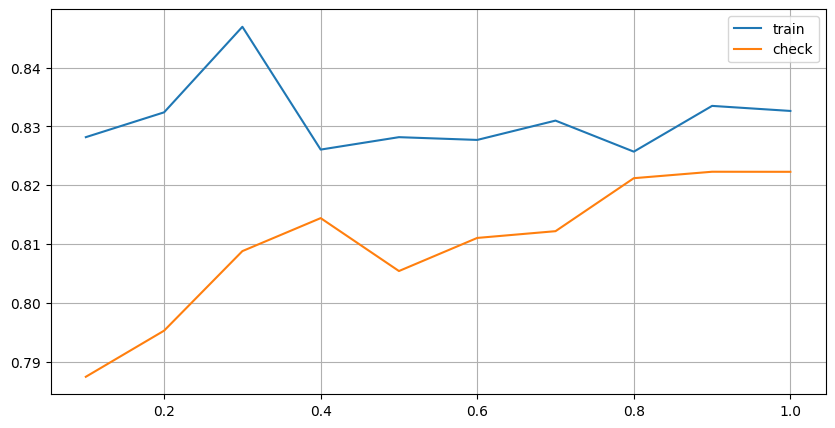

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 11, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


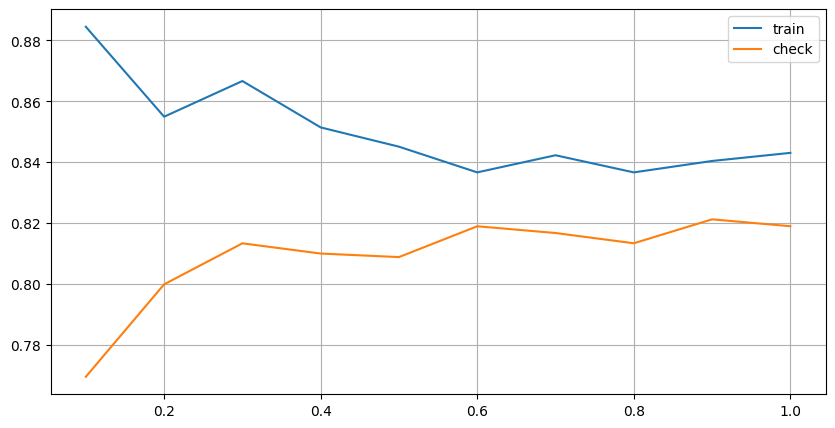

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 11, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


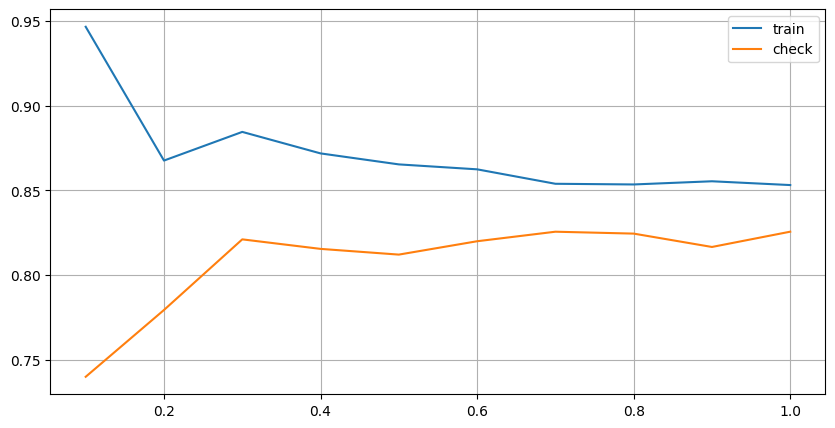

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 11, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


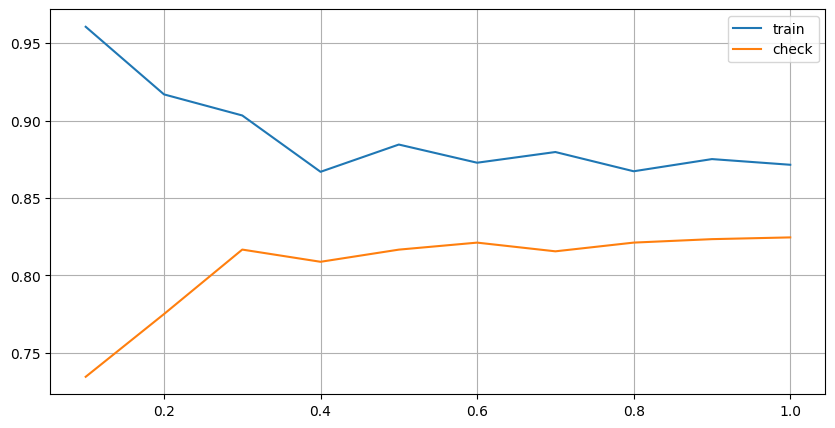

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 11, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


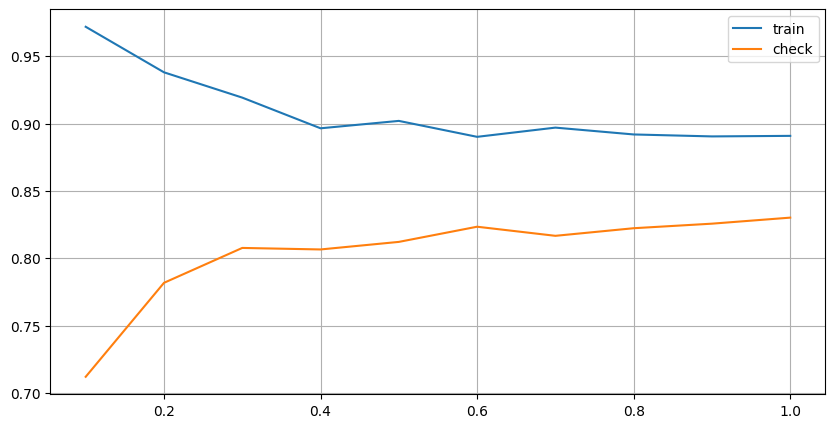

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 11, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


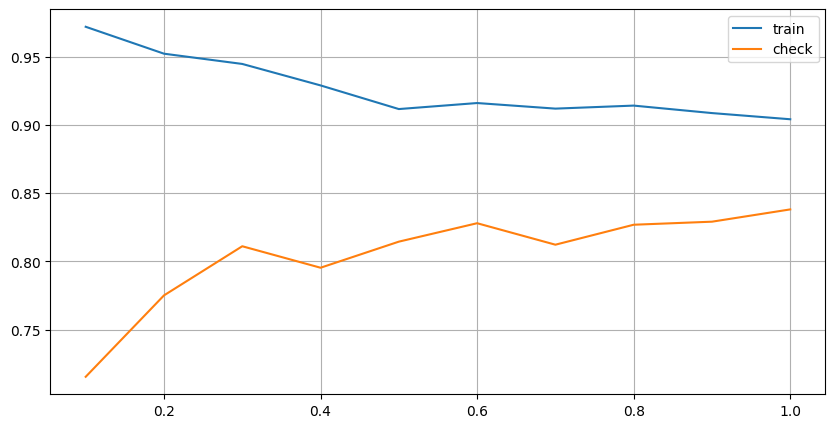

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 11, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


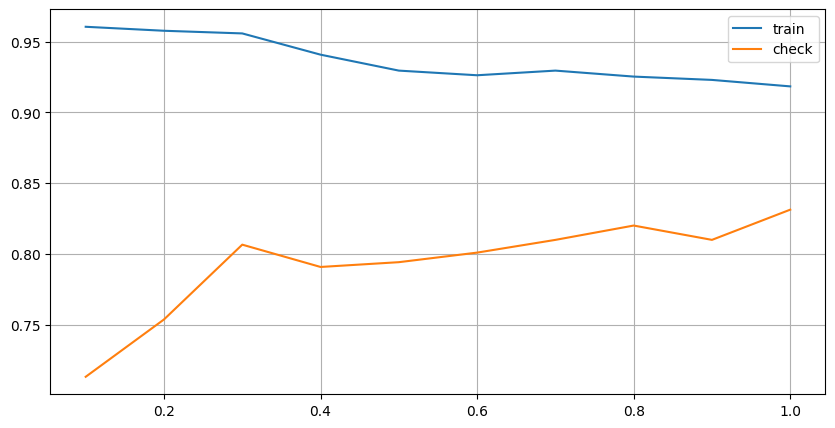

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 12, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


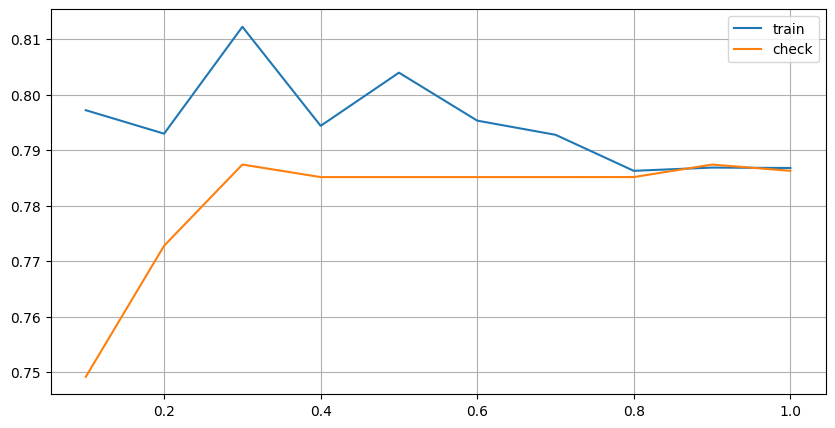

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 12, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


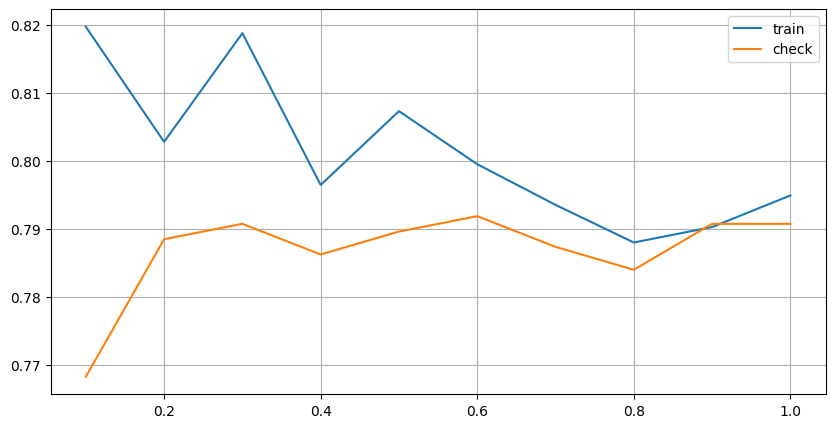

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 12, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


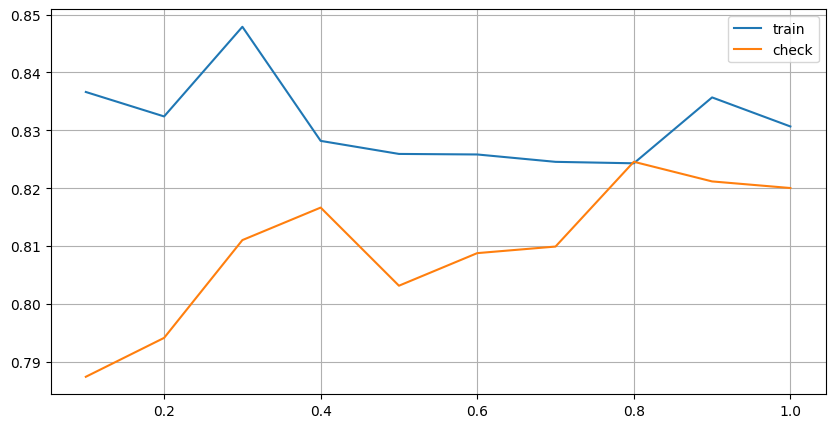

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 12, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


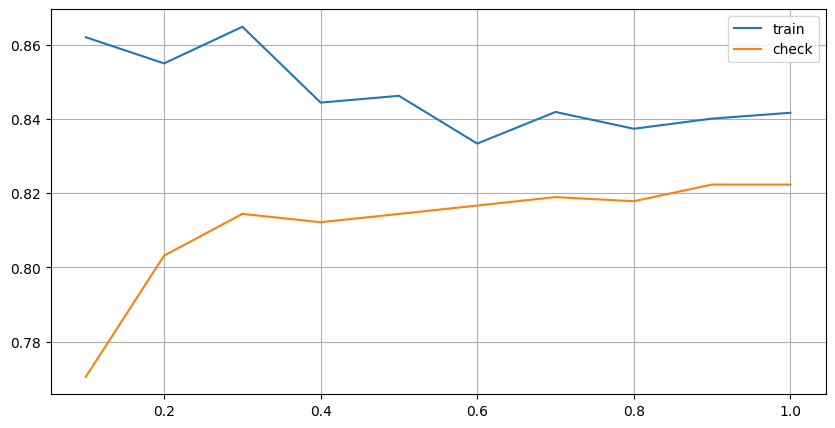

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 12, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


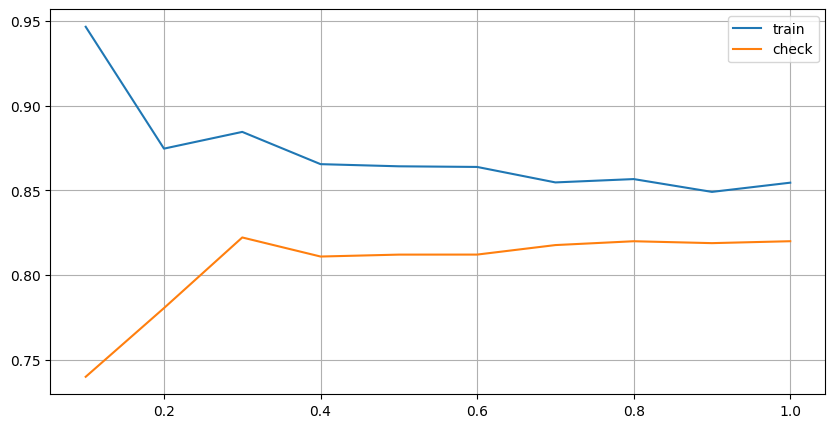

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 12, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


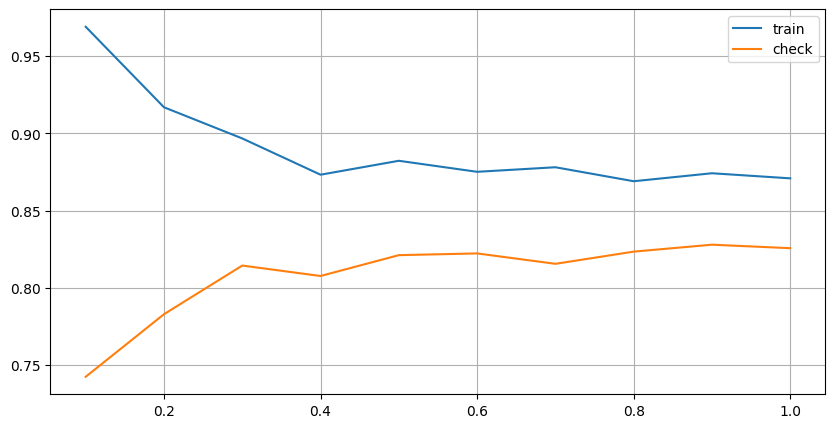

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 12, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


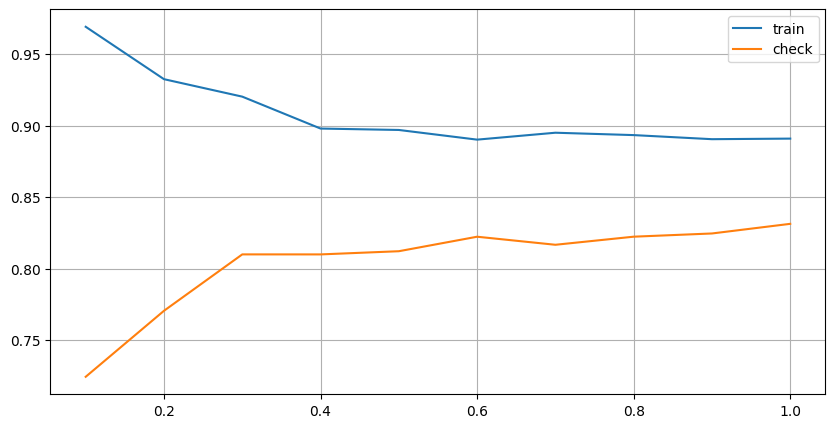

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 12, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


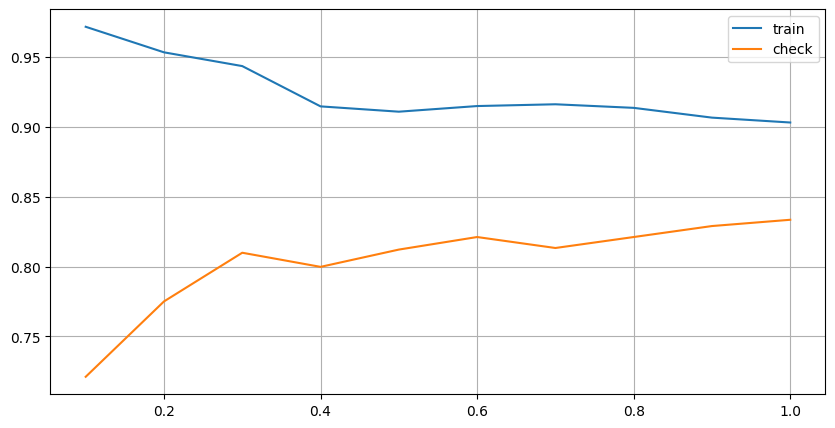

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 12, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


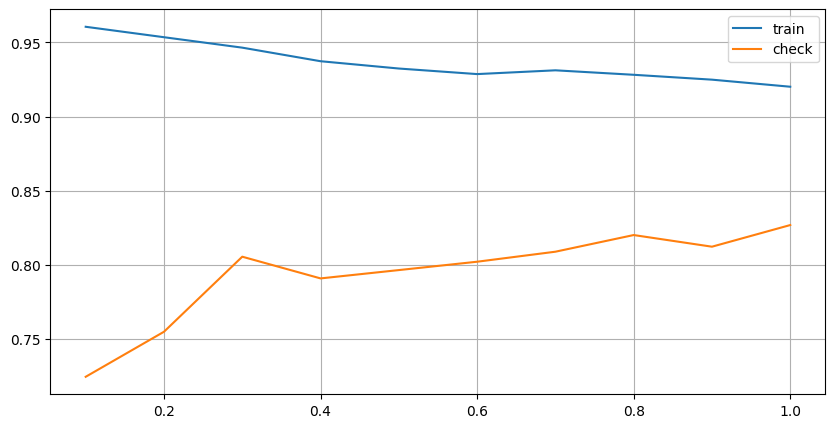

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 13, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


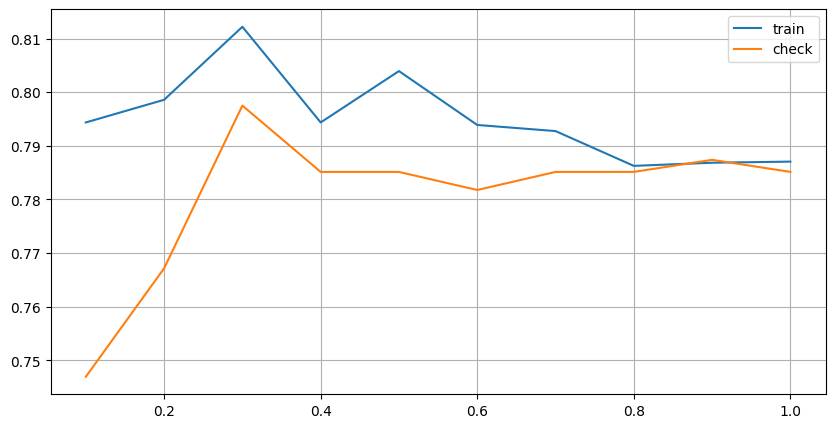

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 13, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


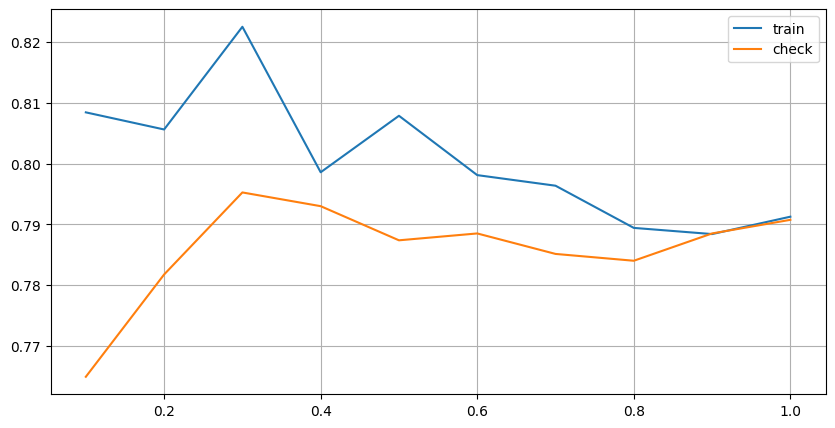

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 13, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


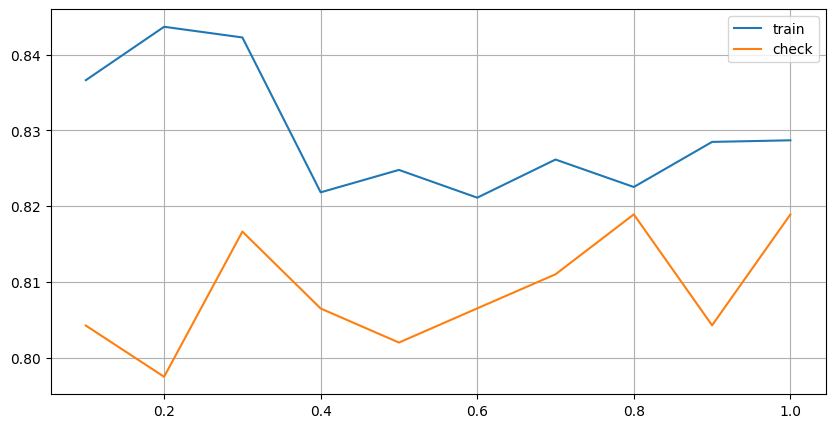

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 13, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


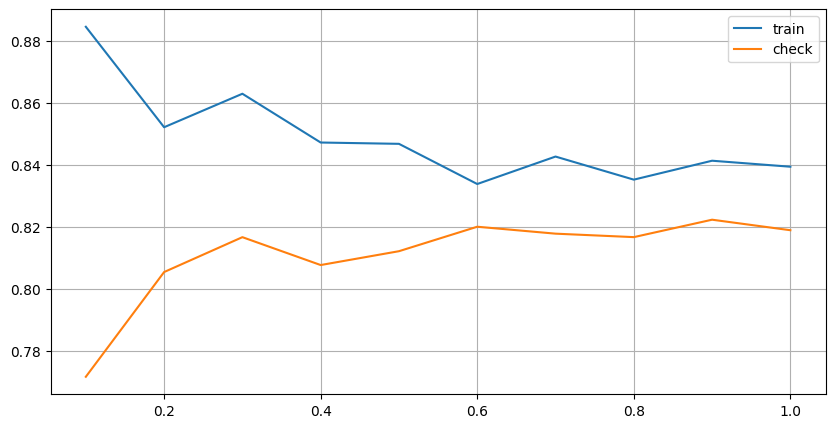

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 13, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


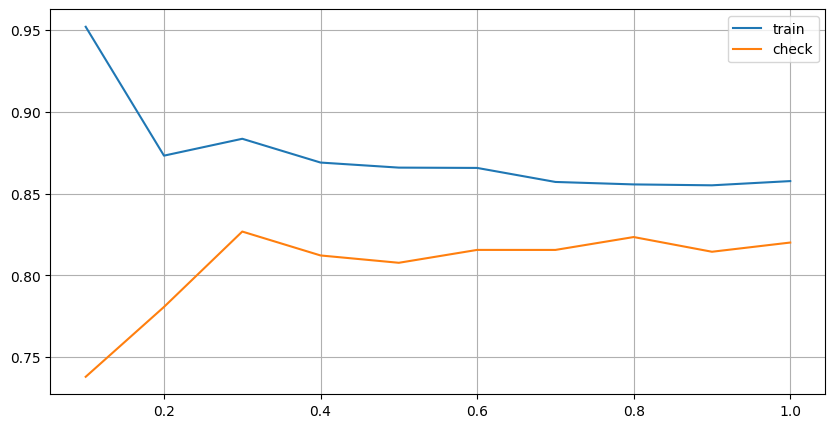

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 13, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


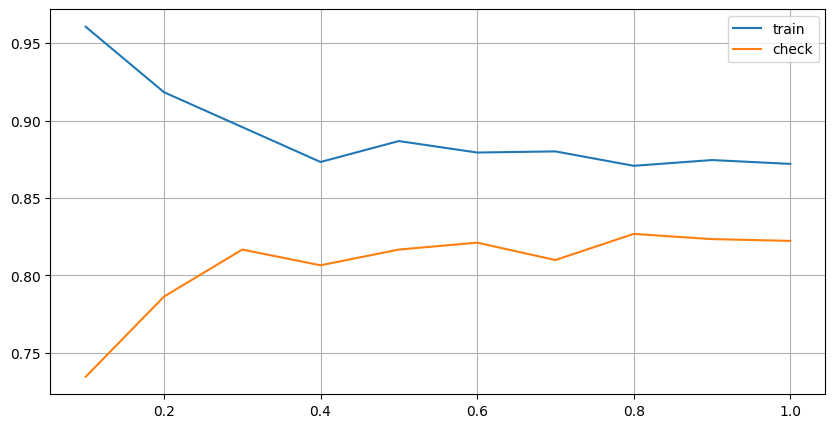

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 13, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


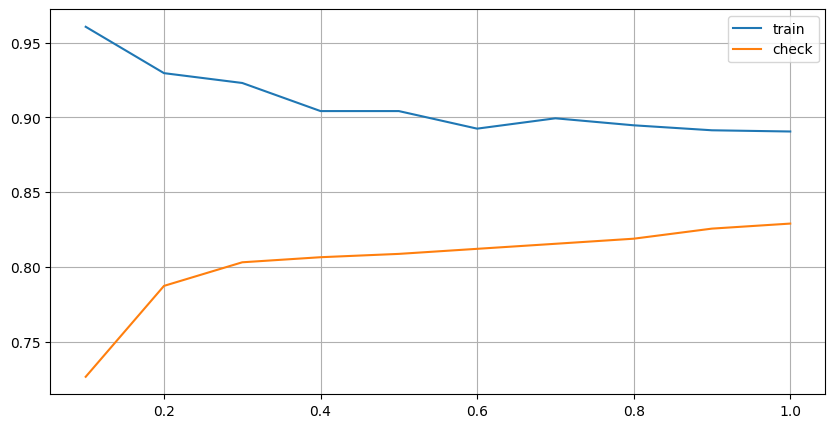

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 13, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


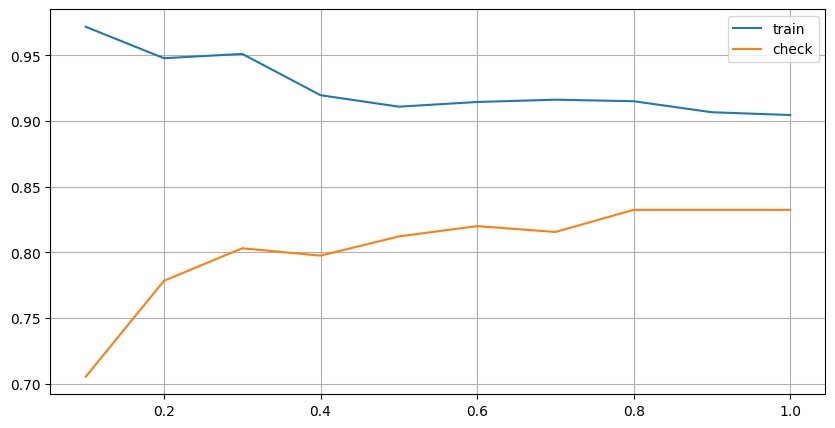

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 13, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


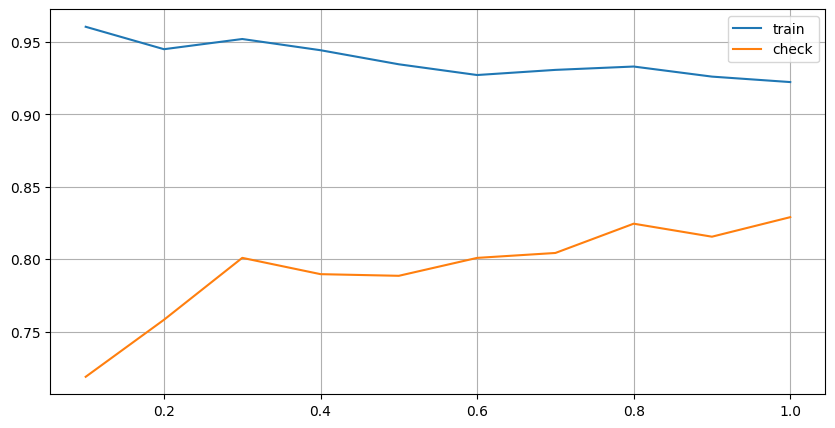

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 14, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


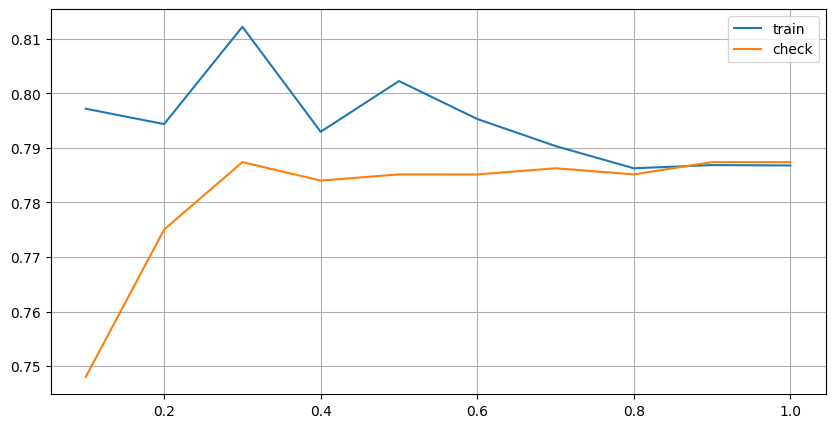

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 14, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


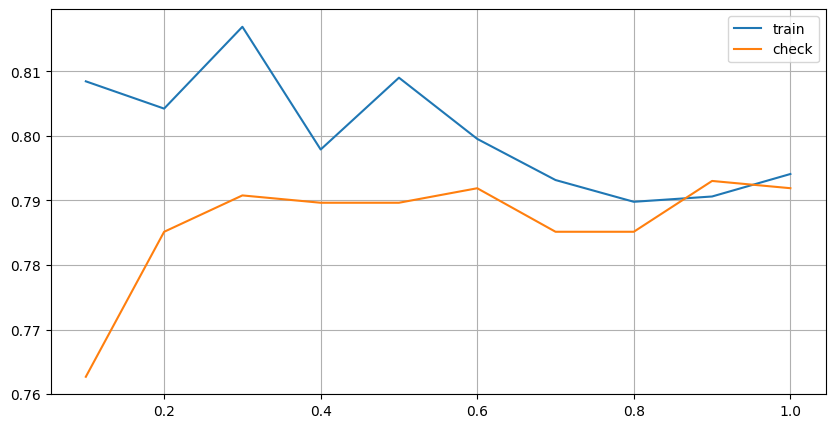

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 14, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


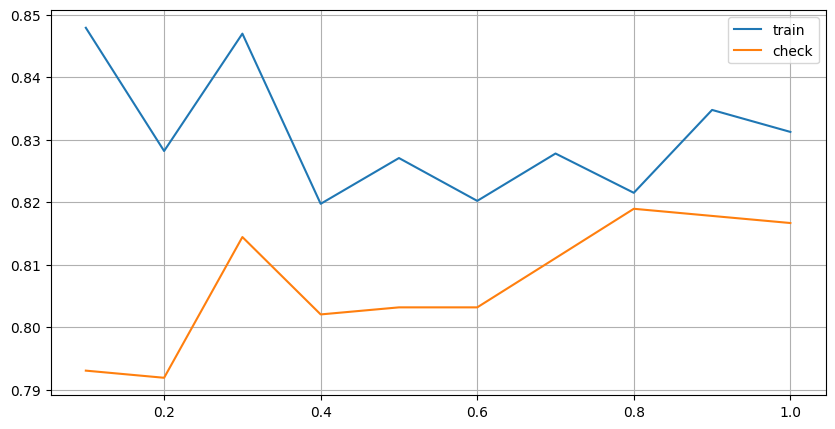

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 14, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


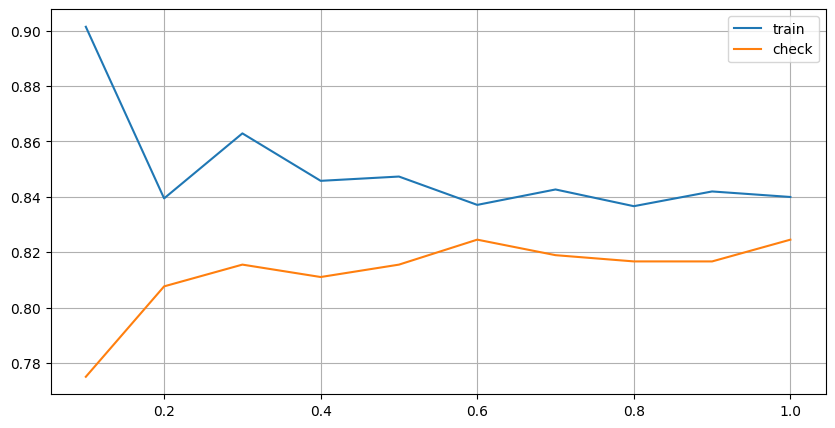

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 14, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


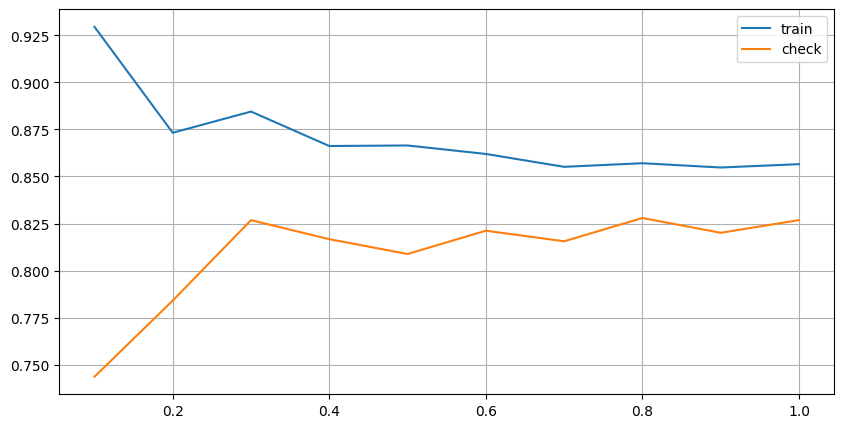

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 14, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


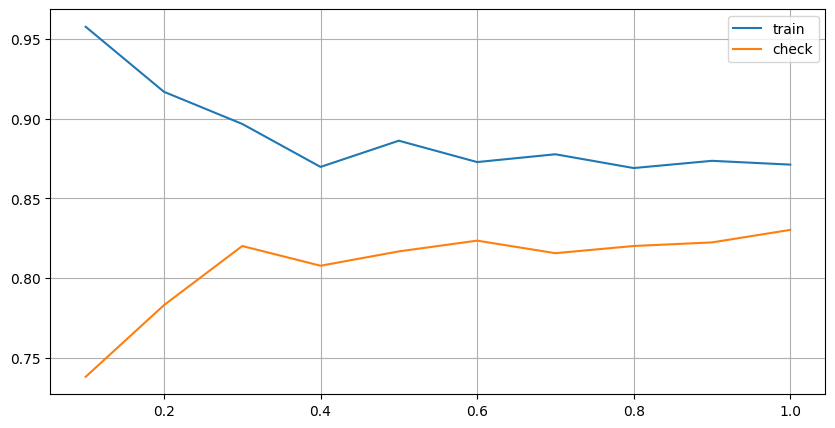

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 14, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


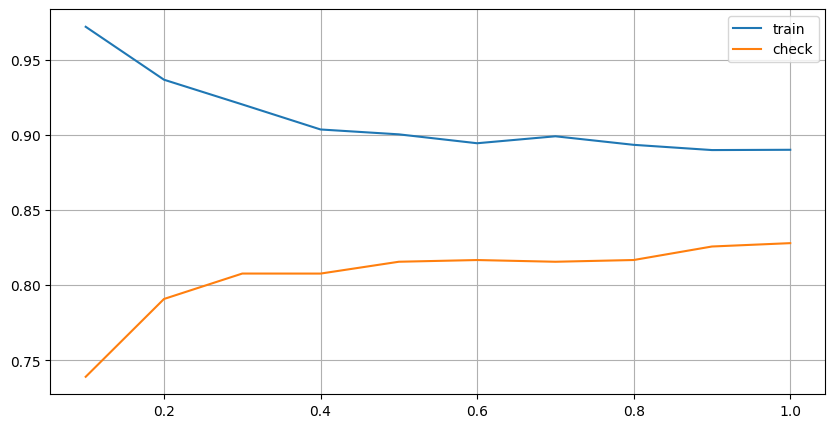

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 14, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


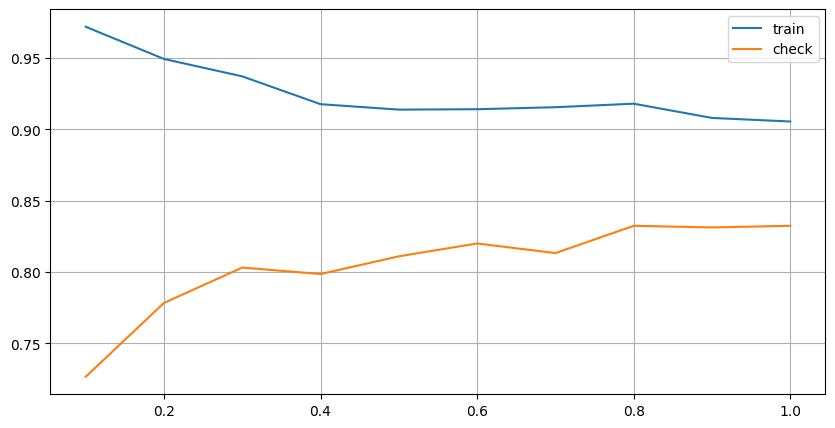

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 14, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


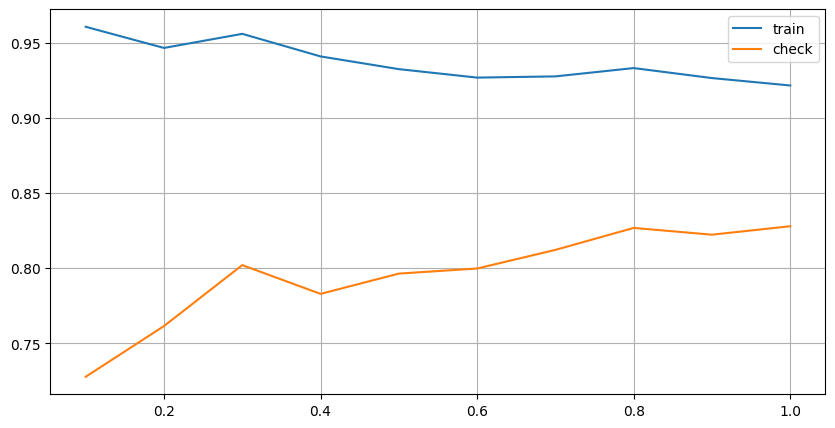

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


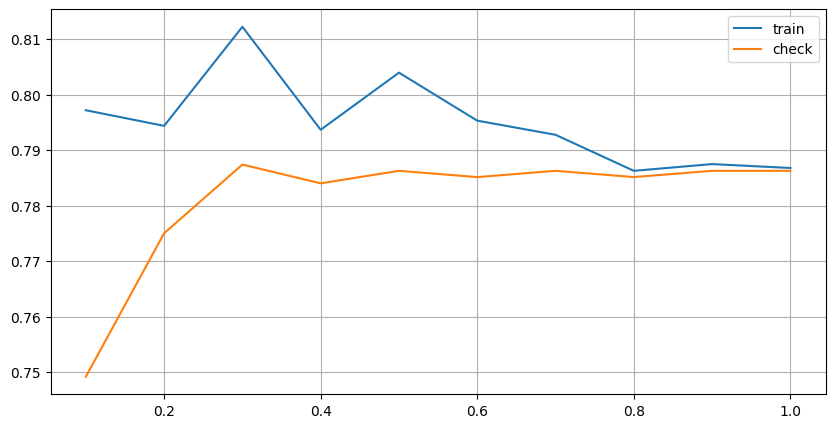

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


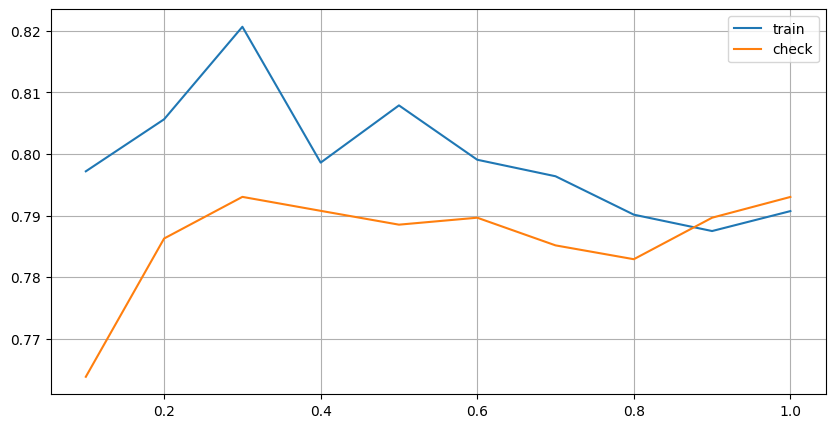

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


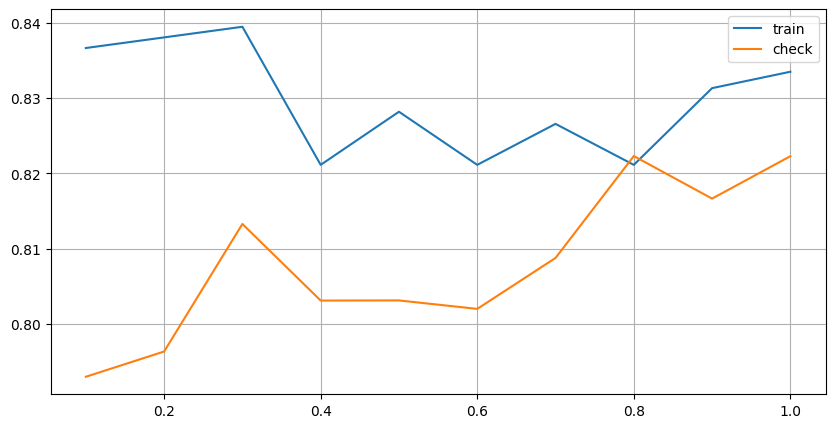

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


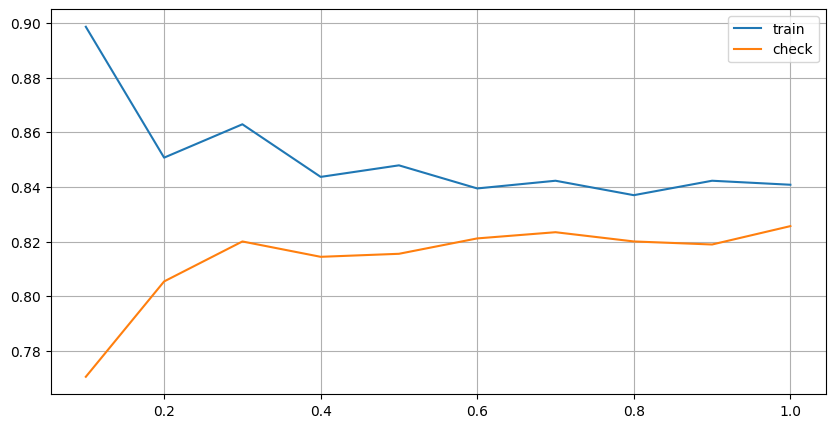

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


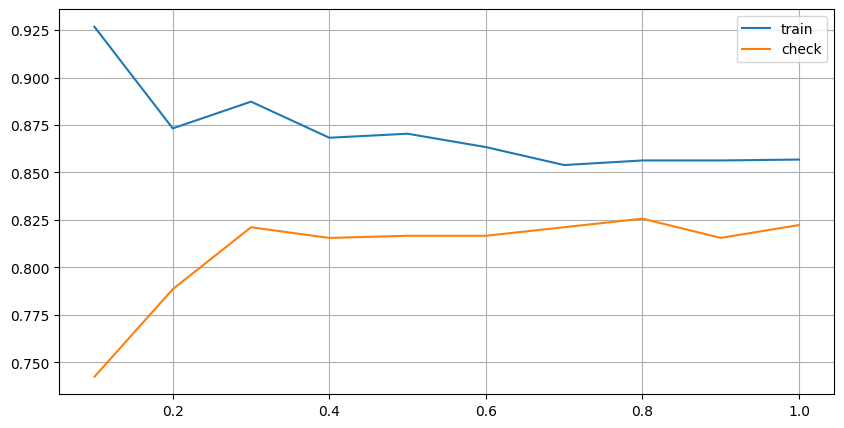

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


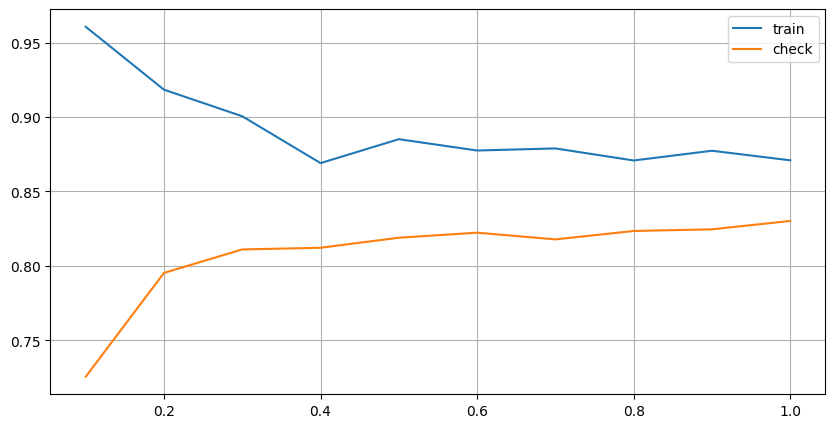

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


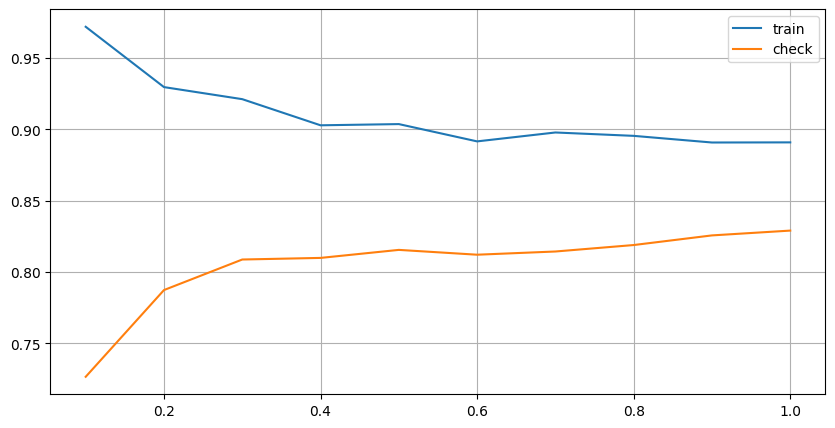

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


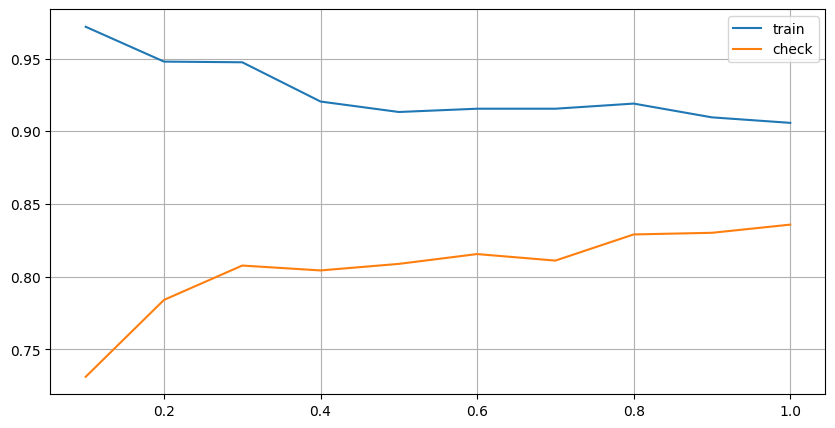

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


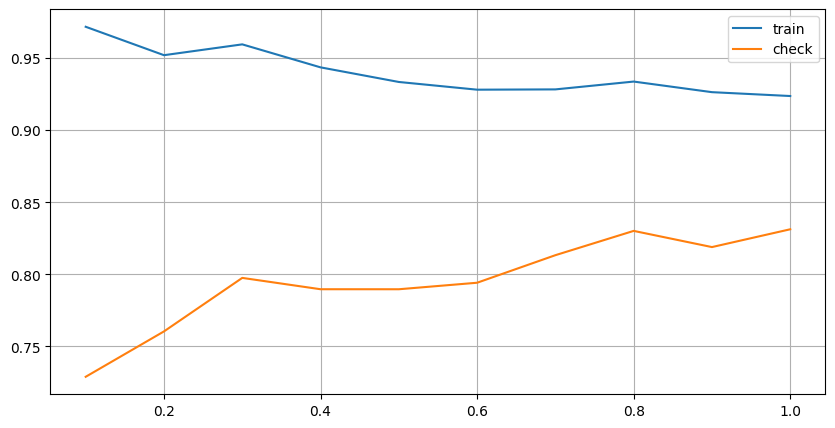

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 16, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


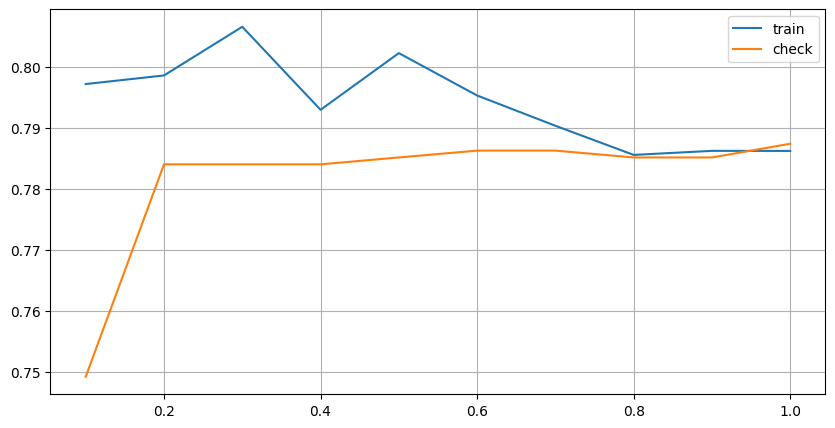

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 16, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


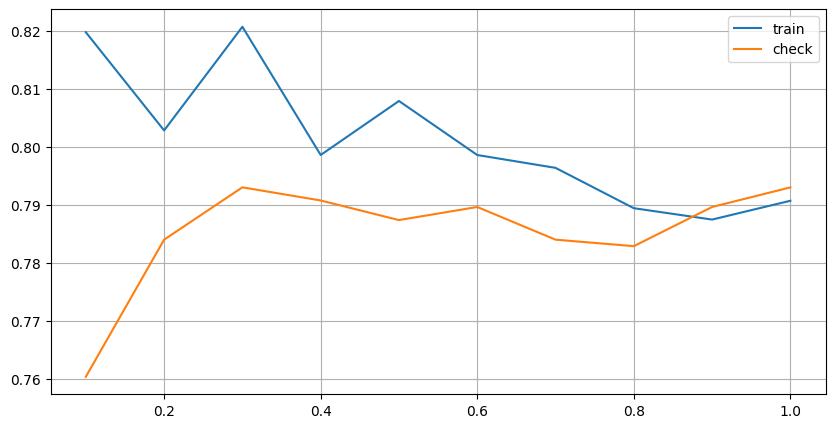

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 16, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


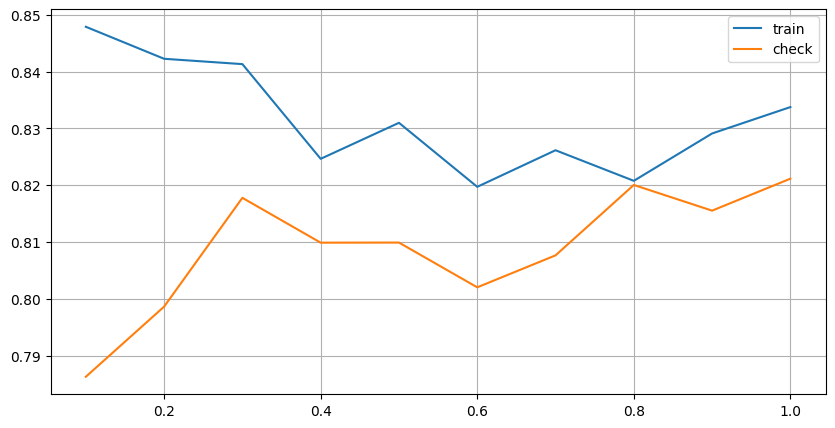

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 16, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


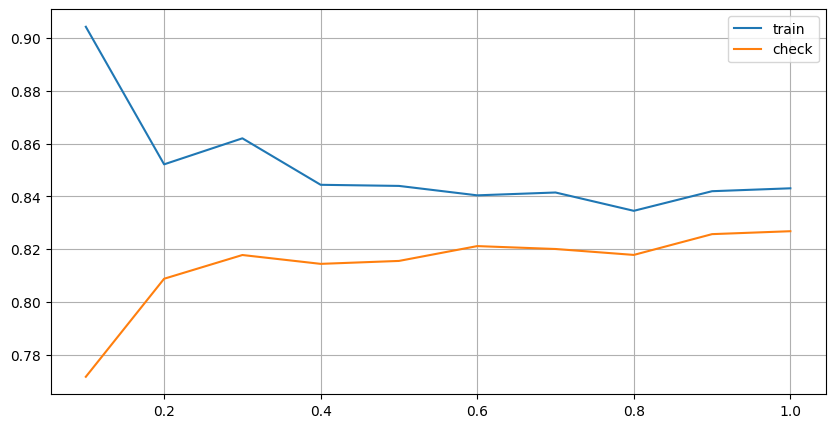

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 16, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


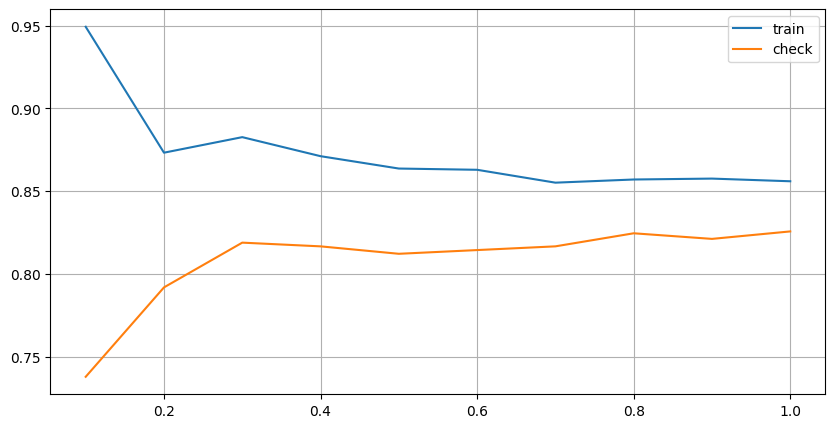

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 16, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


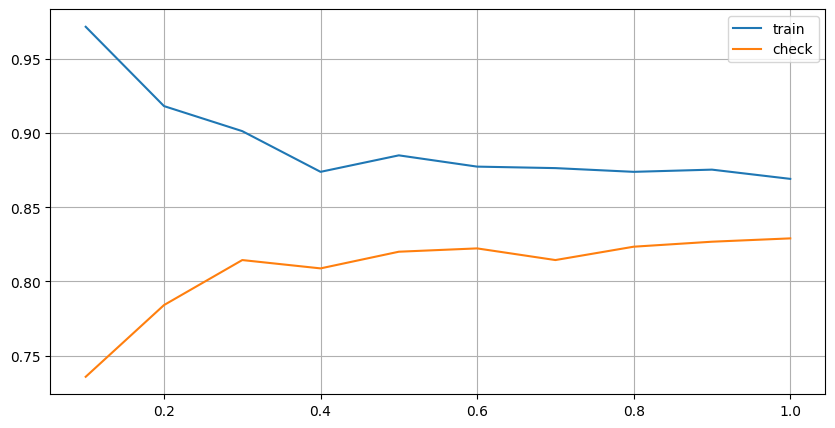

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 16, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


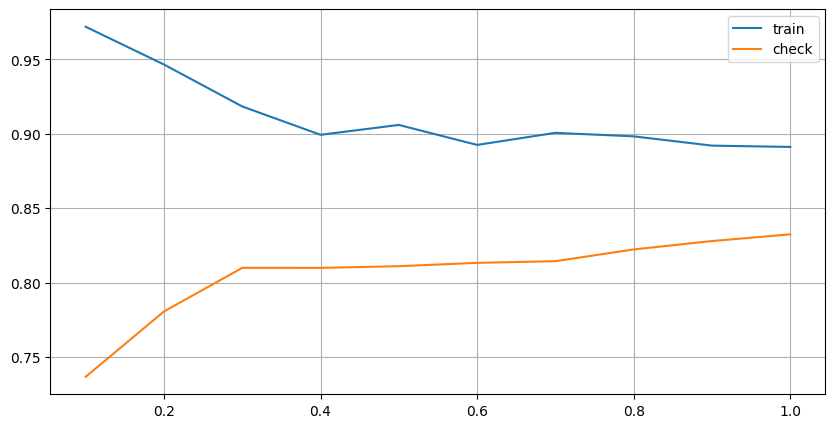

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 16, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


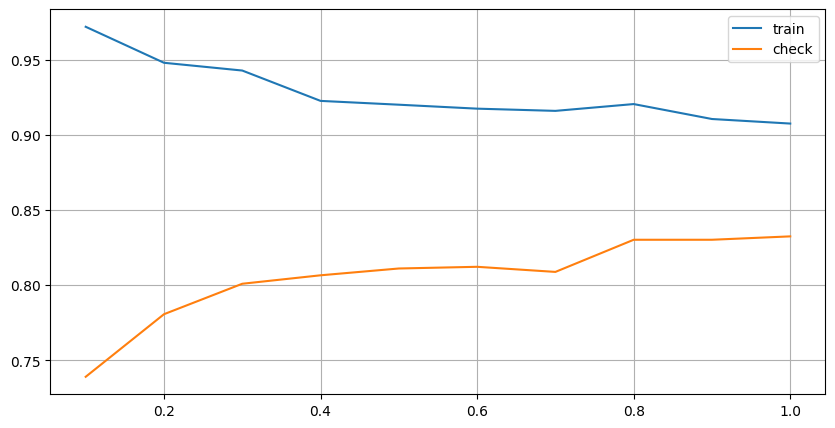

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 16, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


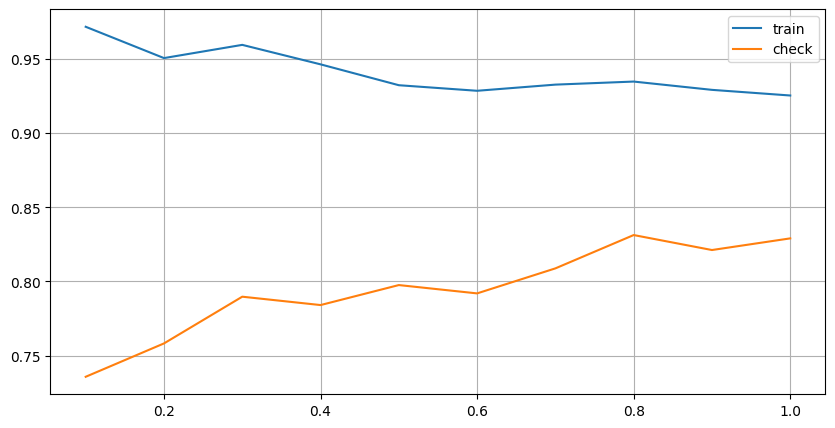

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 17, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


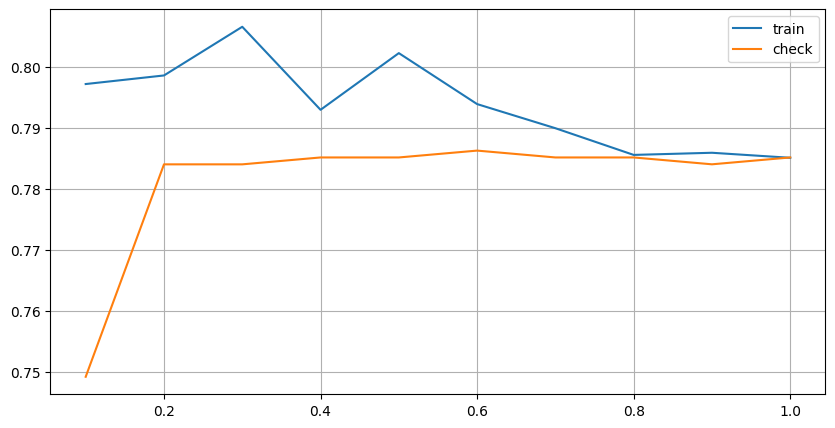

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 17, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


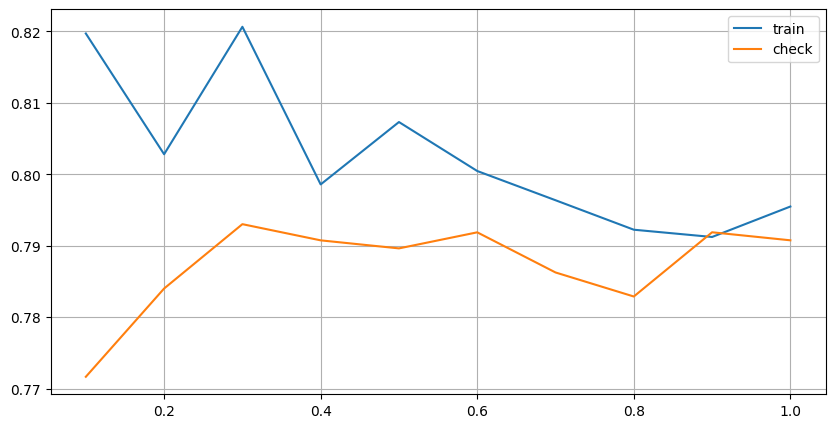

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 17, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


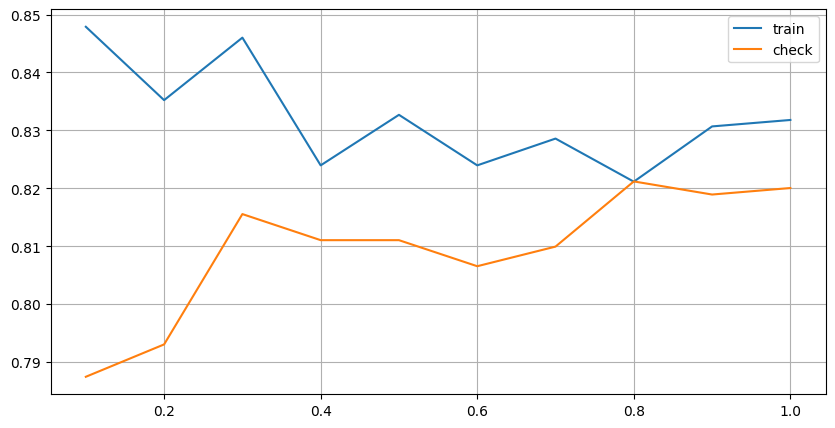

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 17, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


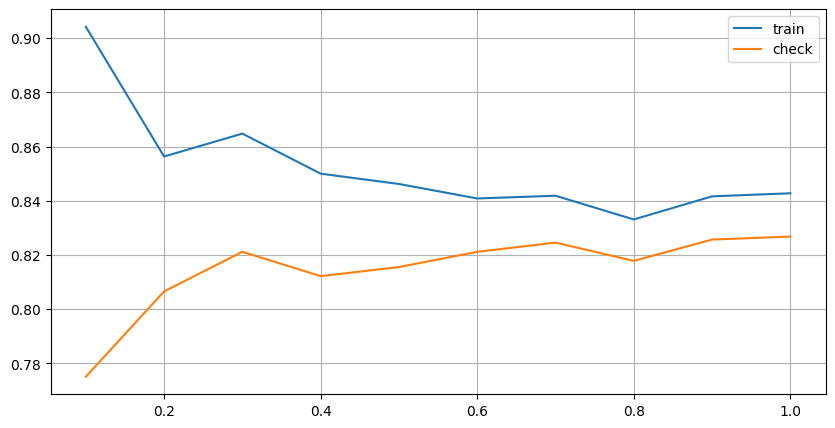

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 17, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


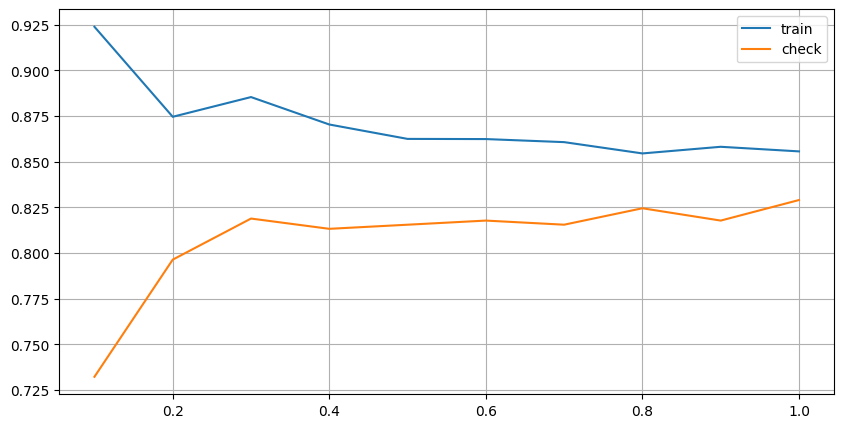

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 17, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


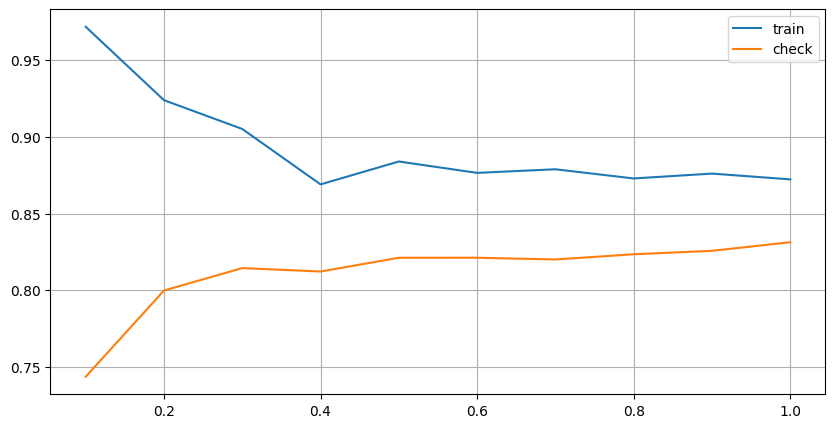

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 17, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


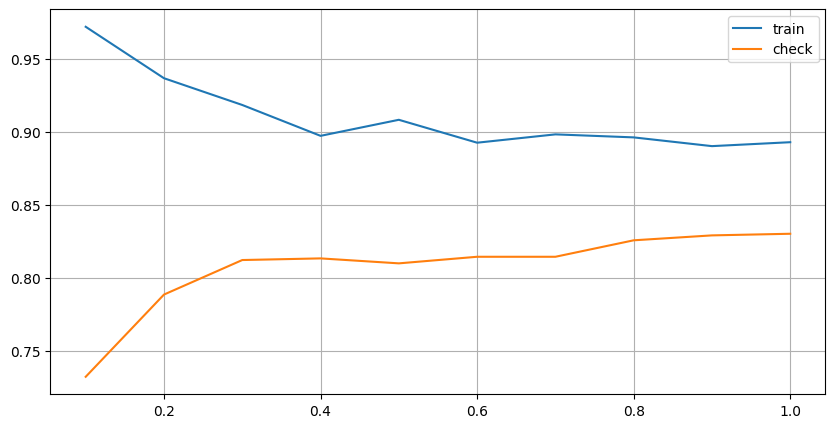

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 17, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


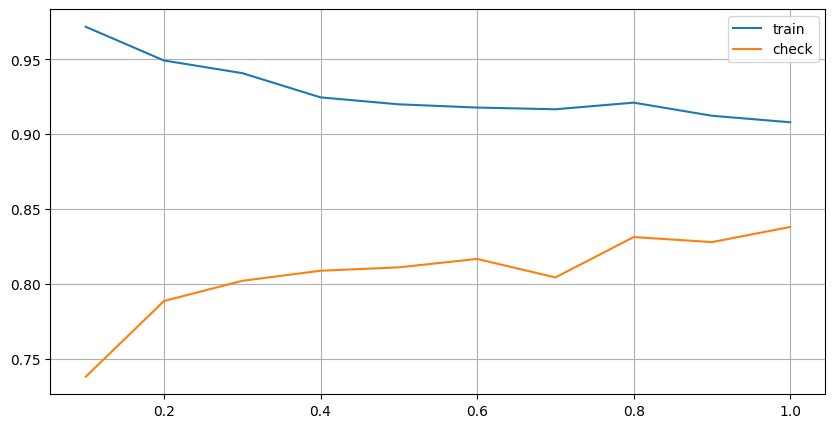

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 17, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


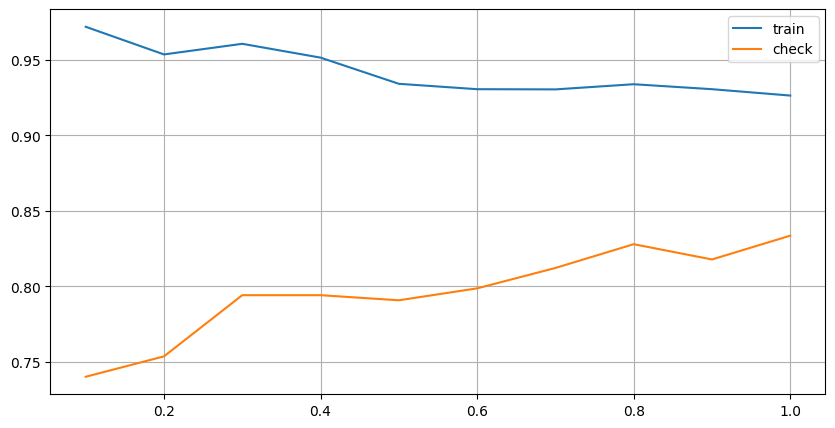

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 18, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


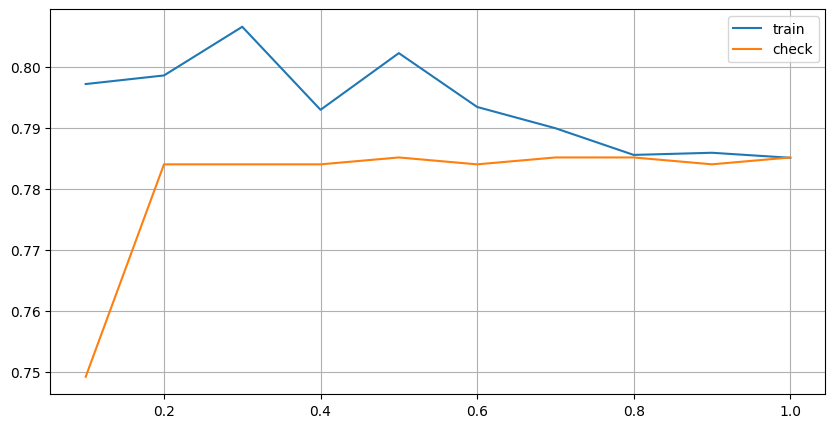

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 18, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


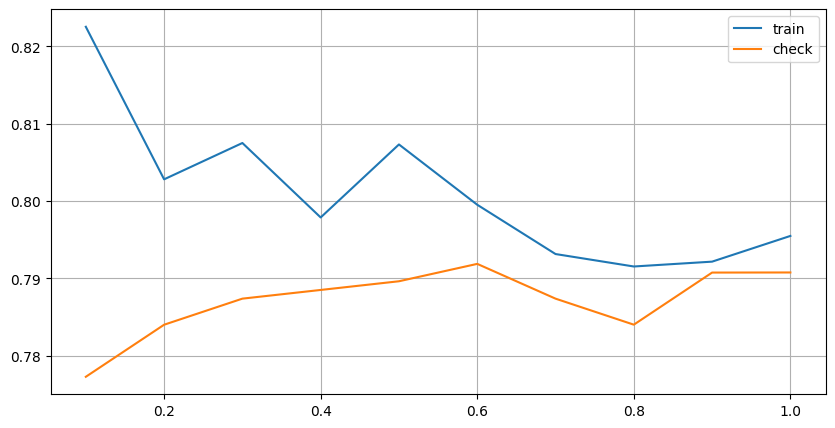

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 18, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


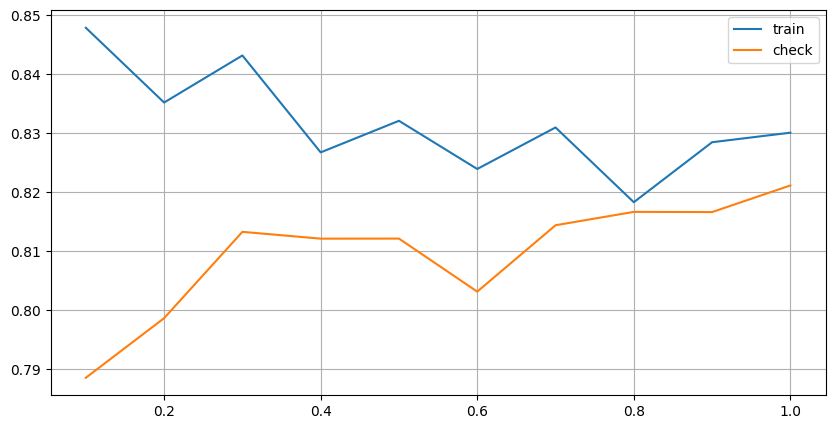

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 18, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


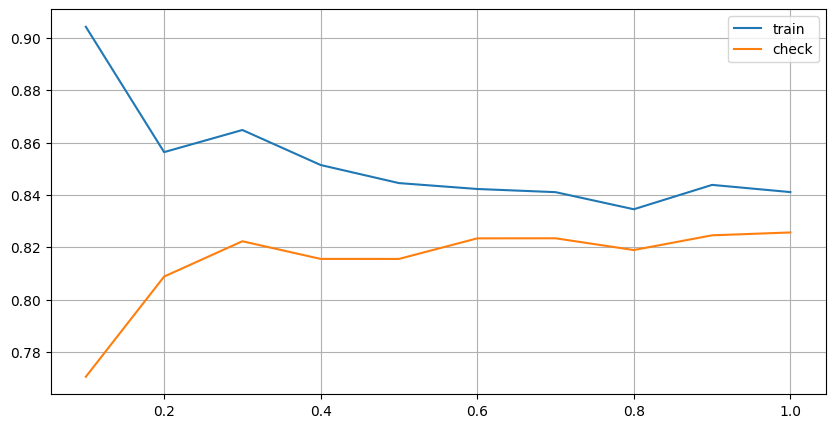

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 18, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


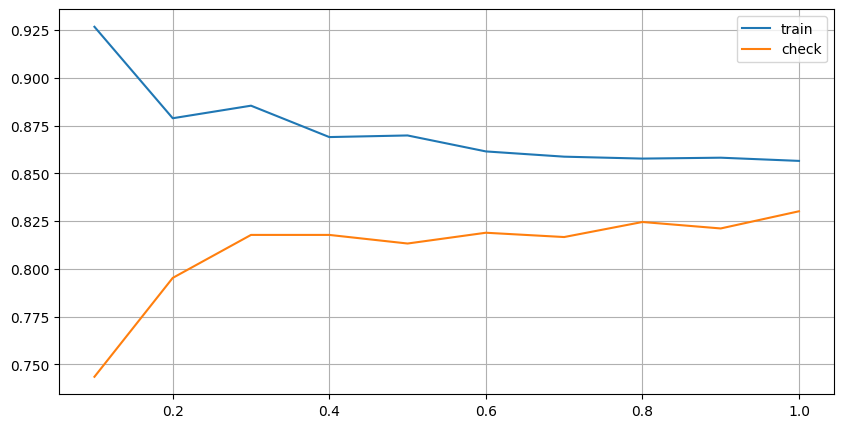

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 18, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


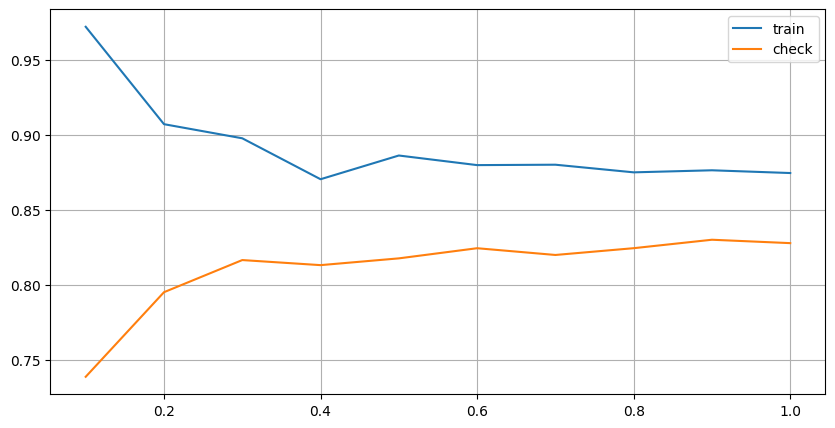

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 18, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


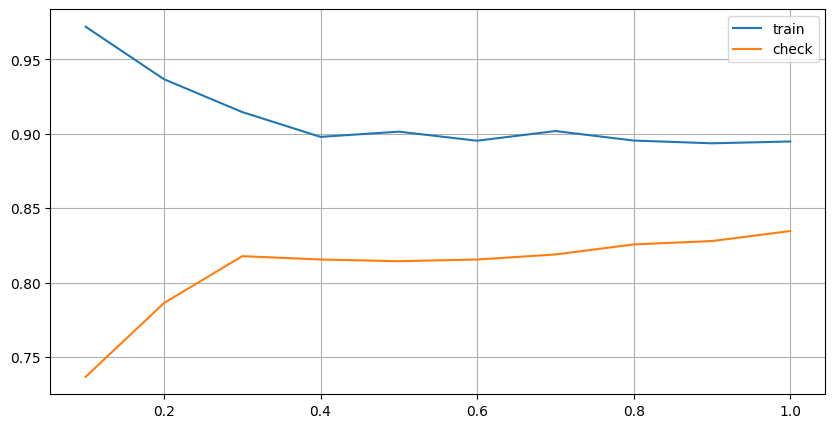

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 18, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


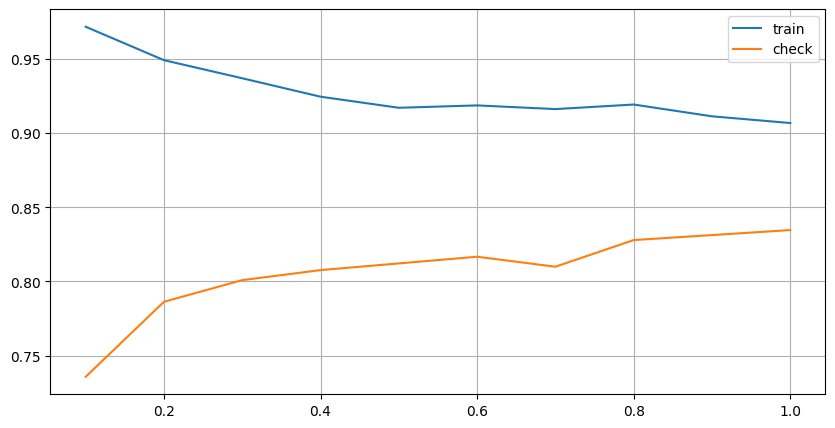

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 18, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


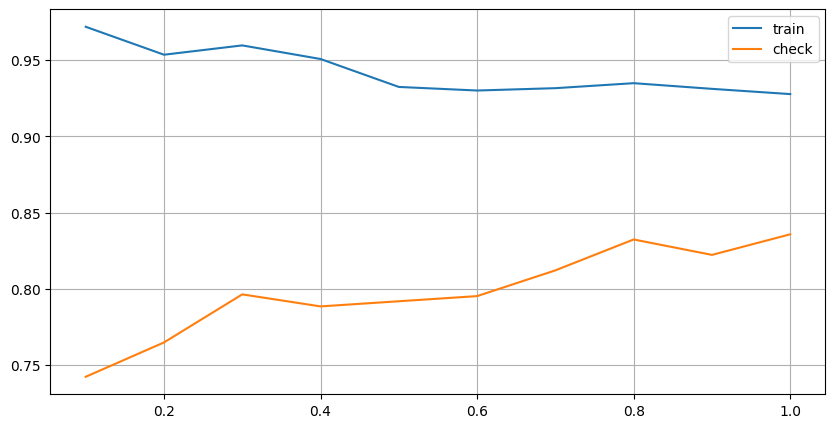

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 19, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


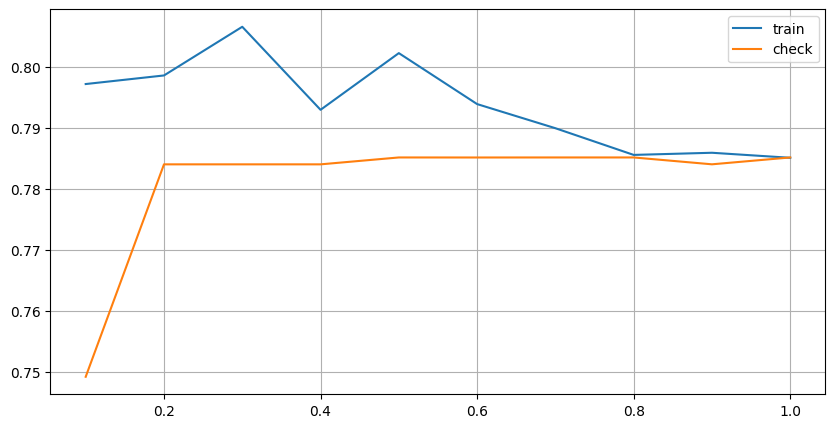

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 19, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


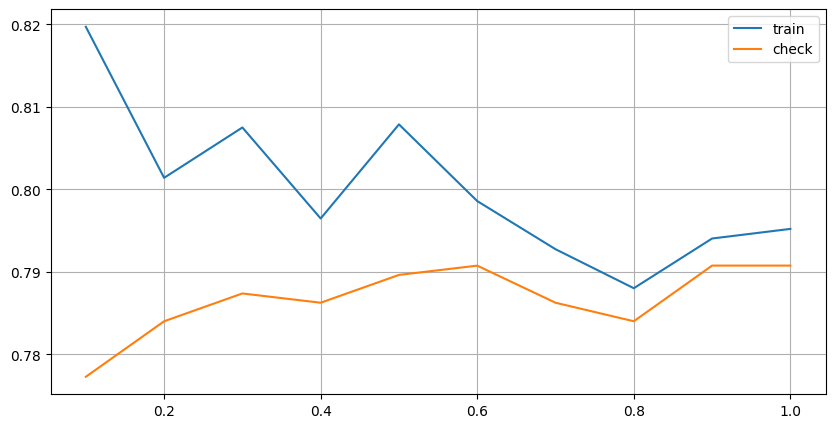

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 19, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


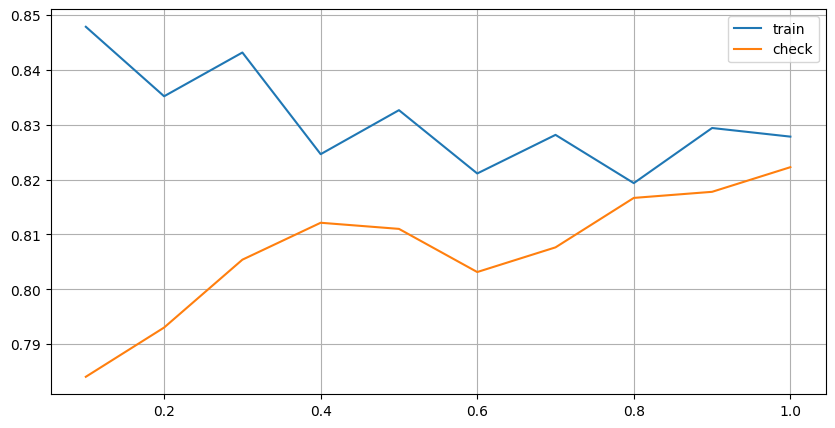

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 19, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


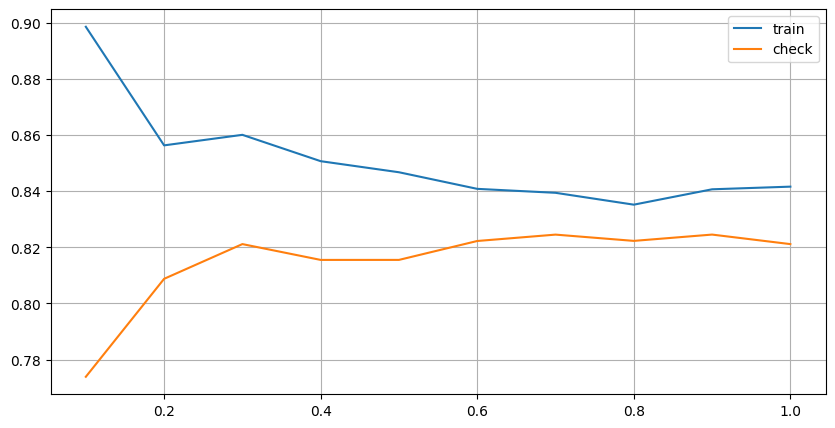

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 19, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


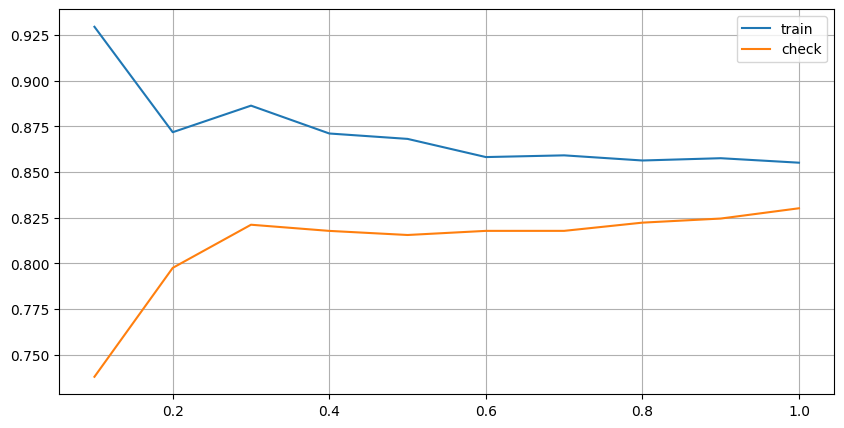

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 19, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


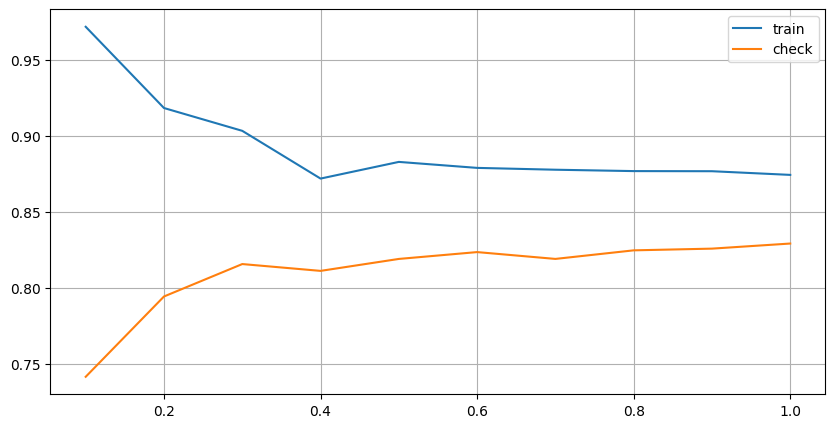

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 19, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


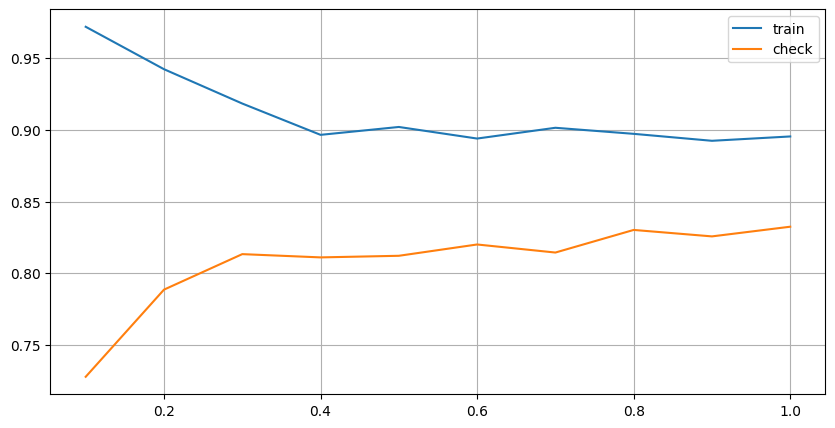

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 19, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


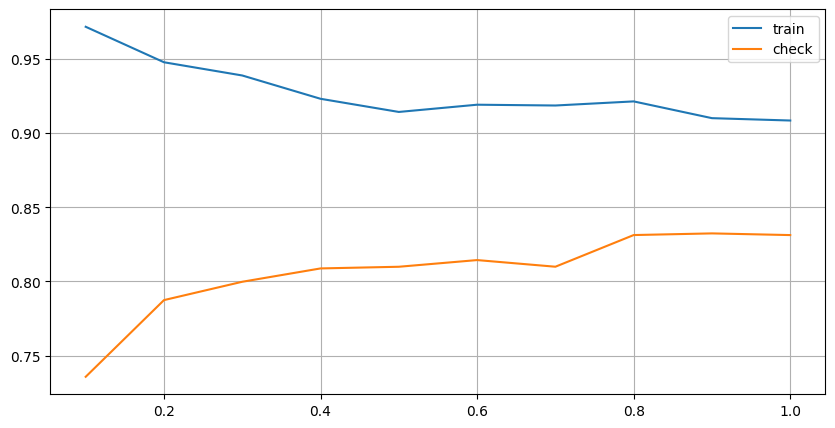

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 19, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


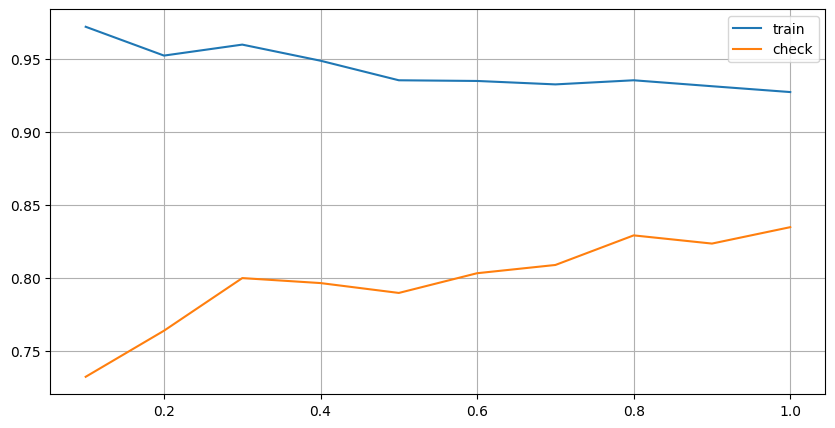

0.905829596412556
5
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 13, 'n_jobs': None, 'oob_score': False, 'random_state': 41, 'verbose': 0, 'warm_start': False}


In [100]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
params = {
    'random_state': [41],#[i for i in range(1, 100)],
    'criterion': ['gini'],
    "n_estimators": [i for i in range(10,20)],
    "max_depth": [i for i in range(1, 10)],
    "max_features": ["sqrt"]
}

split_rand = 5
max_metrics = 0
best_params = None
for rand in [5]:#tqdm(range(1, 50)):
    train_x, check_x, train_y, check_y = train_test_split(x, y, random_state=rand, test_size=0.25)
    for random_state in tqdm(params['random_state'], leave=False):
        for criterion in params['criterion']:
            for n_estimators in params['n_estimators']:        
                for max_depth in params['max_depth']:
                    for max_features in params['max_features']:
                        model = RandomForestClassifier(
                            random_state=random_state,
                            criterion=criterion,
                            n_estimators=n_estimators,
                            max_depth=max_depth,
                            max_features=max_features,
                        )
                        
                        model.fit(train_x, train_y)
                        metrics = accuracy_score(check_y, model.predict(check_x))
                        show_learning_curve(model, x, y)
                        if metrics > max_metrics:
                            split_rand = rand
                            max_metrics = metrics
                            best_params = model.get_params()
                        # metrics = mean_absolute_error(check_y, pred)
                        # metrics = f1_score(check_y, pred)
                        # plot_y.append(metrics)

print(max_metrics)
print(split_rand)
print(best_params)

In [101]:
model = RandomForestClassifier(**best_params)
model.fit(train_x, train_y)
print(accuracy_score(check_y, model.predict(check_x)))

0.905829596412556


0.8789237668161435


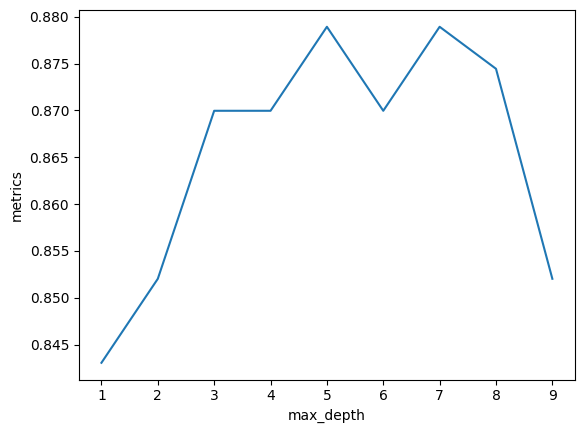

In [102]:
plot_x = range(1, 10)
plot_y = []

for max_depth in plot_x:
    model = RandomForestClassifier(
        random_state=1,
        criterion='gini',
        n_estimators=100,
        max_depth=max_depth,
        max_features='sqrt',
        # n_jobs=-1
    )
    model.fit(train_x, train_y)
    
    metrics = accuracy_score(check_y, model.predict(check_x))
    plot_y.append(metrics)
    
print(max(plot_y))
plt.plot(plot_x, plot_y)
plt.xlabel('max_depth')
plt.ylabel('metrics')
plt.show()


<Axes: >

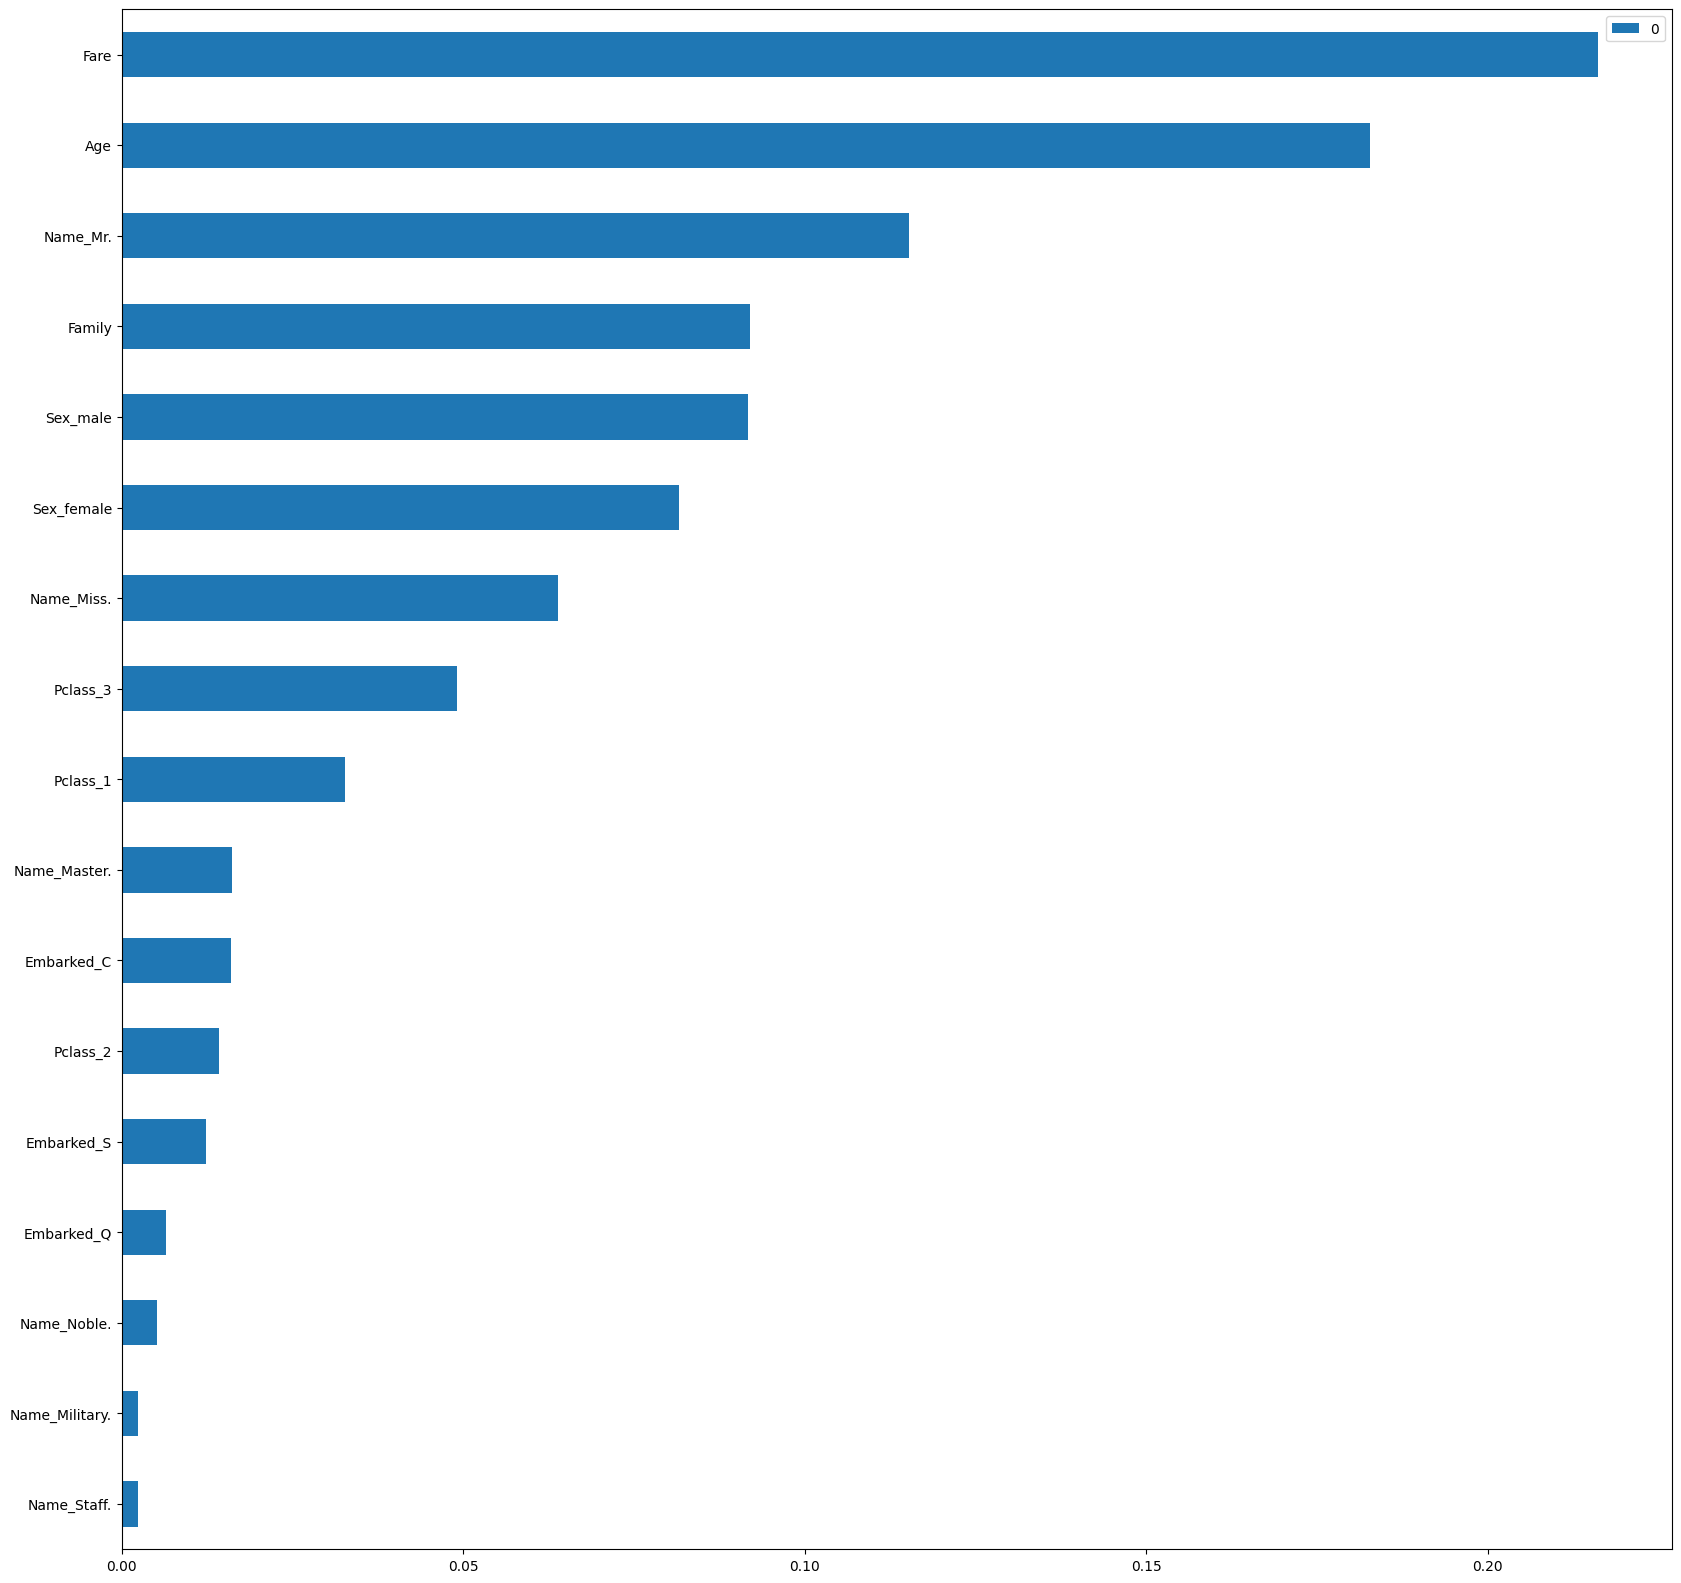

In [103]:
importance = pd.DataFrame(model.feature_importances_, index=train_x.columns)
importance.sort_values(by=0 ,ascending=True, inplace=True)
importance.plot(kind='barh', figsize=(20,20))

In [104]:
train_x

,Age,Fare,Family,Name_Master.,Name_Military.,Name_Miss.,Name_Mr.,Name_Noble.,Name_Staff.,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
98,34,11.500000,2,False,False,True,False,False,False,False,True,False,True,False,False,False,True
489,9,5.300000,3,True,False,False,False,False,False,False,False,True,False,True,False,False,True
866,27,6.929150,2,False,False,True,False,False,False,False,True,False,True,False,True,False,False
839,28,29.700000,1,False,False,False,True,False,False,True,False,False,False,True,True,False,False
185,28,50.000000,1,False,False,False,True,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,26,8.050000,1,False,False,False,True,False,False,False,False,True,False,True,False,False,True
119,2,4.467857,7,False,False,True,False,False,False,False,False,True,True,False,False,False,True
702,18,7.227100,2,False,False,True,False,False,False,False,False,True,True,False,True,False,False
207,26,18.787500,1,False,False,False,True,False,False,False,False,True,False,True,True,False,False
